<a href="https://colab.research.google.com/github/CJoffee/JBM3_EEE4022F/blob/master/JFFCAL001_EEE4022F_JBM3_Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this project is to develop a model and prediction system for air quality, taking into account measurements of air pollutants such as nitric oxide (NO) and various particulate matter (PM<sub>2.5</sub>, etc.).

**Please note that the following cells up until the revision to using Diepkloof station can be considered preamble or introductory to some of the libraries and functions used later for the reported investigation at Diepkloof Station.**

To begin with, we will use data available from the South African Air Quality Information System (SAAQIS) website for the Table View monitoring station. Data immediately available is from September 1st 2017 onwards. This includes measurements of the following, averaged hourly, and in order:<br>
* Ambient pressure ($mBar$)
* Ambient temperature ($C°$)
* Ambient Temp<sub>10</sub> ($C°$)
* Interior temperature ($C°$)
* Nitric oxide (NO) ($ppb$)
* Nitrogen dioxide (NO<sub>2</sub>) ($ppb$)
* Sum of nitrogen oxides (NO<sub>X</sub>) ($ppb$)
* Particulate matter 10 micrometers or less in diameter (PM<sub>10</sub>) ($\mu$$g/m$<sup>$3$</sup>)
* PM<sub>10</sub> load ($\%$)
* Particulate matter 2,5 micrometers or less in diameter (PM<sub>2,5</sub>) ($\mu$$g/m$<sup>$3$</sup>)
* Relative humidity ($\%$)
* Sulphur dioxide (SO<sub>2</sub>) ($ppb$)
* Solar radiation ($W/m$<sup>$2$</sup>)
* Wind direction ($°$)
* Wind speed ($m/s$)

The data was downloaded as an Excel File from the SAAQIS website. In Excel, any empty cells or cells containing "----" representing lost or invalid data were replaced by "INVALID". <br> Another note, the data downloaded from SAAQIS had to be reformatted slightly: The header lines in the original table were combined (i.e. "Amb Pressure" and "mBar" across two lines were reformatted into "Amb Pressure (mBar)") so that there was only a single header line for the table. The original also included a singular first line including data about the readings, such as station name, timebase, etc. This line was removed from the reformatted file to ensure compatibility with the <b>pandas</b> library

First, the Python Data Analysis library <b>pandas</b> will be imported to read a .csv file of this data.

In [1]:
import pandas as pd

The relevant .csv will have to be uploaded. First iterations required the user upload the file using the upload widget, then PyDrive Google Drive integrations, but now files will be loaded from  directly from GitHub. If using PyDrive, first the imports:

In [2]:
## Direct upload
#from google.colab import files
#uploaded = files.upload()

## PyDrive Imports
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

Then the PyDrive client is authorised and created using Google Account credentials:

In [3]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [4]:
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#     name=fn, length=len(uploaded[fn])))
# replace the id with id of file, in this case ID of TableView_2017-2020_csv.csv
#downloaded = drive.CreateFile({'id':"1YxpTjmmrerdIFHOjaG4PmfYaVRtsf8Nh"}) 
#downloaded.GetContentFile('TableView_2017-2020_csv.csv')

Next, the .csv file for data from September 1st 2017 to March 19th 2020 will be read.

In [5]:
## Direct upload
#import io
#df1 = pd.read_csv(io.BytesIO(uploaded['TableView_2017-2020_csv.csv']))
#df1 = pd.read_csv('TableView_2017-2020_csv.csv')
# Dataset is now stored in a Pandas Dataframe

# GitHub Direct
url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/TableView_2017-2020_csv.csv"
df1 = pd.read_csv(url)

print(df1)

               DateTime Amb Pressure (mBar)  ... WD (deg) WS (m/s)
0      01/09/2017 01:00                1025  ...      171      1.9
1      01/09/2017 02:00                1025  ...      174      2.2
2      01/09/2017 03:00                1025  ...      171      2.5
3      01/09/2017 04:00                1025  ...      140      2.3
4      01/09/2017 05:00                1025  ...      133      1.1
...                 ...                 ...  ...      ...      ...
22339  19/03/2020 20:00                1012  ...      172      3.3
22340  19/03/2020 21:00                1013  ...      178      2.7
22341  19/03/2020 22:00                1013  ...      193      2.8
22342  19/03/2020 23:00                1014  ...      263      1.2
22343  19/03/2020 24:00                1014  ...      338      1.2

[22344 rows x 16 columns]


The datafram <b>df1</b> saved above still contains strings of "INVALID" which I have discovered to inferfere with the analysis of the frame. The first solution to be explored will be to drop any lines with bad data in them, so that the frame consists of only full lines.

In [6]:
# Eliminate invalid data from dataframe
# List of column names.
data_columns = df1.columns.values.tolist()
#Exclude the first column, as this is always the DateTime field.
data_columns = data_columns[1:]
#data_columns
#data_columns.remove("Amb Pressure (mBar)")
#data_columns.remove("Amb Temp_10 (C)")
#data_columns.remove("Int Temp (C)")
#data_columns.remove("NO (ppb)")
#data_columns.remove("NOX (ppb)")
#data_columns.remove("PM10 (ug/m3)")
#data_columns.remove("PM10_Load (%)")
#data_columns.remove("Solar Rad (watt/m2)")
#data_columns.remove("WD (deg)")


# Save to new variable, num_df1, where non-numeric data is replaced by a NaN
num_df1 = (df1.drop(data_columns, axis=1).join(df1[data_columns].apply(pd.to_numeric, errors='coerce')))

# Drop rows with any missing data
num_df1 = num_df1.dropna()
num_df1.describe()

,Amb Pressure (mBar),Amb Temp (C),Amb Temp_10 (C),Int Temp (C),NO (ppb),NO2 (ppb),NOX (ppb),PM10 (ug/m3),PM10_Load (%),PM2.5 (ug/m3),Rel Hum (%),SO2 (ppb),Solar Rad (watt/m2),WD (deg),WS (m/s)
count,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000,14784.000000
mean,1012.541734,21.031588,30.001962,23.870759,4.443858,11.433847,15.880614,60.317776,32.004938,64.845103,77.387446,3.778139,263.539773,180.050189,4.431656
std,28.580170,23.628650,0.058518,1.296505,8.780461,11.581408,17.907498,858.258788,20.560042,737.048194,29.118903,12.080214,343.796754,92.270388,6.029415
min,503.000000,-50.000000,28.900000,15.000000,-11.000000,-32.000000,-42.000000,-23781.000000,9.000000,-62.000000,0.000000,-62.000000,0.000000,0.000000,0.200000
25%,1011.000000,16.000000,30.000000,23.000000,1.000000,5.000000,7.000000,2.000000,10.000000,1.000000,61.000000,-1.000000,0.000000,153.000000,2.500000
50%,1014.000000,19.000000,30.000000,24.000000,2.000000,8.000000,11.000000,13.000000,30.000000,5.000000,76.000000,1.000000,40.000000,179.000000,3.800000
75%,1017.000000,22.000000,30.000000,25.000000,4.000000,15.000000,19.000000,20.000000,45.000000,8.000000,94.000000,3.000000,503.000000,254.000000,5.200000
max,1032.000000,154.000000,32.500000,28.900000,216.000000,121.000000,272.000000,32507.000000,80.000000,27560.000000,268.000000,242.000000,1160.000000,360.000000,62.100000


We can see from above that the size of the dataframe has been reduced. We conclude that the DataFrame has been reduced to only full lines of numeric data, excluding the DateTime. The indices stay the same however. From here we may explore the various analysis methods available to us in the <b>pandas</b> library.<br> For instance, a basic linear regression requires we calculate the sum of differences to a mean. We will test to see that this function works:

In [7]:
num_mean = num_df1.mean()
print(num_mean)

Amb Pressure (mBar)    1012.541734
Amb Temp (C)             21.031588
Amb Temp_10 (C)          30.001962
Int Temp (C)             23.870759
NO (ppb)                  4.443858
NO2 (ppb)                11.433847
NOX (ppb)                15.880614
PM10 (ug/m3)             60.317776
PM10_Load (%)            32.004938
PM2.5 (ug/m3)            64.845103
Rel Hum (%)              77.387446
SO2 (ppb)                 3.778139
Solar Rad (watt/m2)     263.539773
WD (deg)                180.050189
WS (m/s)                  4.431656
dtype: float64


Clearly, with the above data set, this function yields numeric values that we may use going forward. To get an impression of the set of data we are working with, we will plot a histogram for each numerical column in the dataset to count the occurences of certain ranges.

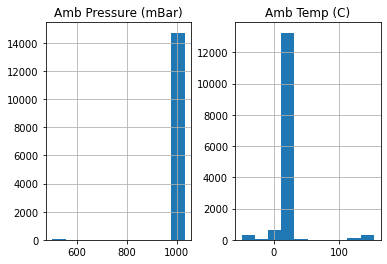

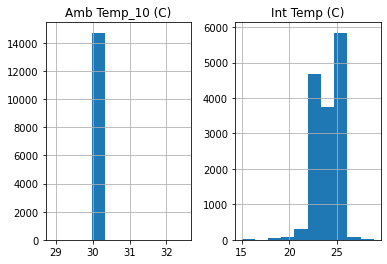

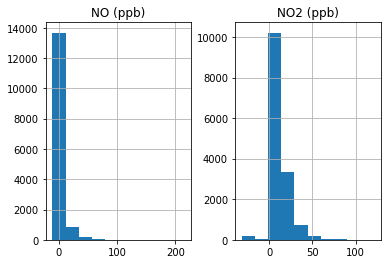

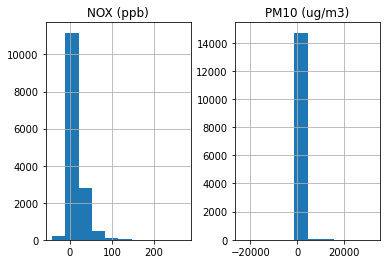

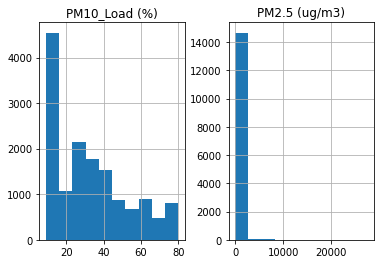

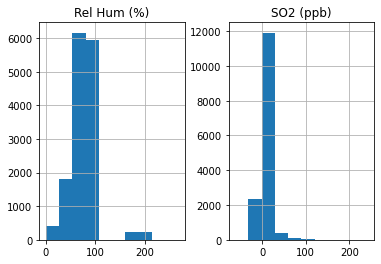

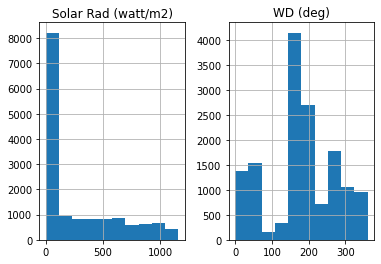

In [8]:
for i in range(0, len(data_columns)-1, 2):
  num_df1.hist(column=[data_columns[i],data_columns[i+1]], bins=10)

The data set has been significantly reduced however. We will briefly explore the effect on the DataFrame and <b>mean</b> function if we do not drop rows with NaN values:

In [9]:
# Save to new variable, nan_df1, where we will leave NaN values in the frame
nan_df1 = (df1.drop(data_columns, axis=1)
         .join(df1[data_columns].apply(pd.to_numeric, errors='coerce')))
nan_mean = nan_df1.mean()

nan_df1.describe()

,Amb Pressure (mBar),Amb Temp (C),Amb Temp_10 (C),Int Temp (C),NO (ppb),NO2 (ppb),NOX (ppb),PM10 (ug/m3),PM10_Load (%),PM2.5 (ug/m3),Rel Hum (%),SO2 (ppb),Solar Rad (watt/m2),WD (deg),WS (m/s)
count,20878.000000,20874.000000,16700.000000,20877.000000,19243.000000,19243.000000,19246.000000,18008.000000,16699.000000,16700.000000,20878.000000,19542.000000,20874.000000,20669.000000,20669.000000
mean,1008.370917,19.355658,30.001455,23.746070,4.529335,11.537702,16.068897,53.593903,31.438409,60.506048,77.517147,3.836097,244.102855,177.956650,4.228206
std,56.690527,21.467042,0.057031,1.476572,10.005648,11.896990,19.120067,798.929941,20.540078,707.735955,27.301458,11.978893,333.847541,94.122266,5.290899
min,503.000000,-50.000000,28.900000,15.000000,-11.000000,-32.000000,-42.000000,-23781.000000,9.000000,-62.000000,0.000000,-62.000000,0.000000,0.000000,0.200000
25%,1011.000000,15.000000,30.000000,22.600000,1.000000,5.000000,6.000000,1.000000,9.000000,1.000000,62.000000,-1.000000,0.000000,144.000000,2.400000
50%,1014.000000,18.000000,30.000000,24.000000,2.000000,8.000000,11.000000,11.000000,29.000000,4.000000,77.000000,1.000000,16.000000,178.000000,3.700000
75%,1018.000000,21.000000,30.000000,25.000000,4.000000,15.000000,19.000000,19.000000,43.000000,8.000000,95.000000,3.000000,461.000000,253.000000,5.100000
max,1033.000000,154.000000,32.500000,28.900000,237.000000,121.000000,299.000000,32507.000000,80.000000,27560.000000,268.000000,242.000000,1160.000000,360.000000,62.100000


We can compare the two tables. The simplest comparison would be to compare the means of all columns and see what effect the larger data set has on the results.<br>
The differece between the table with <b>NaN</b> values and the table of only whole numeric rows is thus:

In [10]:
print("NAN_MEAN - NUM_MEAN :")
for i in range(nan_mean.size):
  print(nan_mean.index[i], nan_mean[i]-num_mean[i], sep=":\t")

NAN_MEAN - NUM_MEAN :
Amb Pressure (mBar):	-4.170817552880976
Amb Temp (C):	-1.675930447403033
Amb Temp_10 (C):	-0.0005064902662184068
Int Temp (C):	-0.12468909095073855
NO (ppb):	0.08547711761380405
NO2 (ppb):	0.10385461891691428
NOX (ppb):	0.18828325574370375
PM10 (ug/m3):	-6.72387326411927
PM10_Load (%):	-0.5665282849648285
PM2.5 (ug/m3):	-4.3390549096612006
Rel Hum (%):	0.12970134887942208
SO2 (ppb):	0.05795808428599347
Solar Rad (watt/m2):	-19.436917500675065
WD (deg):	-2.0935393383005305
WS (m/s):	-0.20344935134050424


We can see that the table with NaN values still can calculate a mean, and the results would suggest that the backend handling of NaN types is functioning on a column-by-column basis instead of dropping entire rows. The next test will be a histogram test, like we did previously:

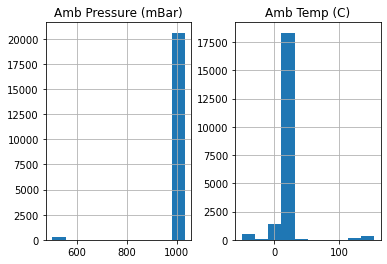

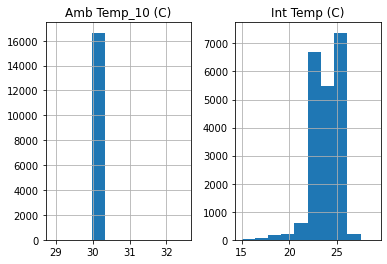

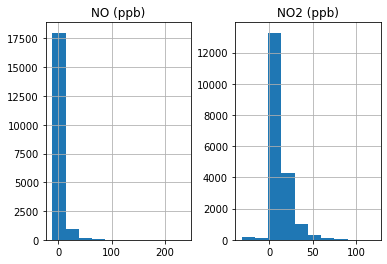

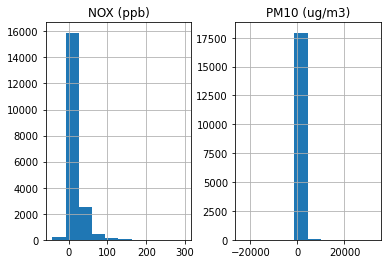

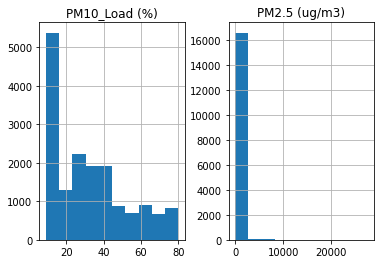

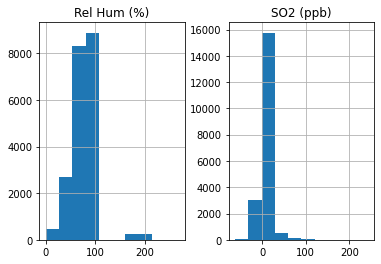

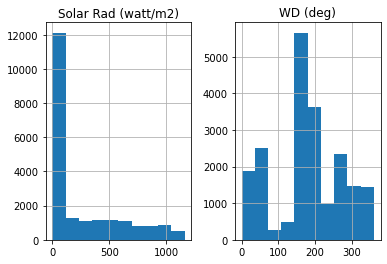

In [11]:
for i in range(0, len(data_columns)-1, 2):
  nan_df1.hist(column=[data_columns[i],data_columns[i+1]], bins=10)

In [12]:
# Line graphs
#for i in range(0, len(data_columns)):
  #nan_df1[data_columns[5]].plot.line()

The first implementation of a linear regression we wish to explore deals with predicting data values based on the progression of time. For the first, simple exploration, we wish to construct a model for each pollutant that depends solely on the time we wish to make the prediction for: namely the Year, Month, Day, and Hour values.<br>
We would require numerical inputs for each, where from we can simply calculate a mean and apply a linear regression from those numbers. Assigning the numbers is fairly trivial: Simply use the date format provided i.e. June 1st 2018 at 11am ("01/06/2018 11:00") gives us the corresponding numbers:
* Day = 1
* Month = 6
* Year = 2018
* Hour = 11

We will simply follow the convention set out by the SAAQIS regarding the Hour numbers. They assigned hours from 1-24 within a day, so the first reading occurs at Hour 1 or 1am on a given day and the last is Hour 24 at midnight of the same day. For now, we will focus on simply reading and assigning these numbers correctly.

In [13]:
# Creates a list of strings from the 'DateTime' column, follows format 'DD/MM/YYYY HH:00'
dates_str = nan_df1['DateTime'].tolist()
date_stamps = []
for d in dates_str:
  day = int(d[:2])
  mnth = int(d[3:5])
  yr = int(d[6:10])
  hr = int(d[11:13])
  # Store in date_stamps list in standard date order [year, month, day, hour]
  date_stamps.append([yr,mnth,day,hr])

# Test, every 1000th time stamp
#for s in date_stamps[0::1000]:
#  print("%04d/%02d/%02d %02d:00:00" % (s[0],s[1],s[2],s[3]))

To perform a multi-variable linear regression, the first method we will employ will be using the <b>statsmodels</b> Python library. A simple test on the numerical table previously showed that the function can construct an appropriate model. We will thus use the full table of values (including **NaN** types) and using the **missing = 'drop'** argument to discard rows on a column-by-column basis. This way, only invalid data that directly impacts the modelling at hand will cause rows to be discarded.

In [14]:
import statsmodels.api as sm

# Testing on the first non-timestamp column of the NaN data table 
X_ols_test = date_stamps
# Add a column of ones for a y-intercept
X_ols_test = sm.add_constant(date_stamps)
#print(X)
test_model = sm.OLS(nan_df1[data_columns[0]],X_ols_test,missing='drop').fit()
test_model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Amb Pressure (mBar)   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     132.3
Date:                 Mon, 29 Jun 2020   Prob (F-statistic):          7.91e-112
Time:                         18:25:21   Log-Likelihood:            -1.1366e+05
No. Observations:                20878   AIC:                         2.273e+05
Df Residuals:                    20873   BIC:                         2.274e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.626e+04   1063.704    -15.289      0.000   -1.83e+04   -1.42e+04
x1             8.5462      0.527     16.223      0.000       7.514       9.579
x2             2.4466      0.120     20.311      0.000       2.210       2.683
x3             0.3399      0.044      7.661      0.000       0.253       0.427
x4            -0.0049      0.056     -0.087      0.931      -0.115       0.105
==============================================================================
Omnibus:                    28903.221   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4676712.572
Skew:                          -8.431   Prob(JB):                         0.00
Kurtosis:                      74.356   Cond. No.                     5.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that this first model has very low R-values. It is theorised that due to the cyclical nature of these numbers (1-24, 1-30 etc) that the linear regression models are not processing the jump discontinuity well. To hopefully alleviate this, we will investigate (i) converting these cyclical discontinuities into continuous variables, and (ii) using the index (0, 1, ..., 22 000, ...) to model time passing in hours from the first reading. It might also be worth investigating using DateTime types for this purpose as well.

Consider a 24 hour analog clock. A day is a regular time unit divided into regular 24 hours. A clock face represents these hours in a polar form, whereas we want to convert to, say, cartesian coordinates. We will replace the **hour** variable we used in our previous model with 2 distinct dimensions that we will use going forward: a sine and cosine dimenstion.

<div align="center"> 
$hr\_sin = sin(2\pi.(hour-1)/24)$ <br>
$hr\_cos = cos(2\pi.(hour-1)/24)$ </div>

Note, the **hour** variable will have to be reduced by one, as we want to preserve the cyclical functionality of 0 == 24, and **hour** ranges from 1-24 naturally.

We can similarly treat the **month** variable in this way with trivial substitution:

<div align="center"> 
$mnth\_sin = sin(2\pi.(month-1)/12)$ <br>
$mnth\_cos = cos(2\pi.(month-1)/12)$ </div>

The **day** variable is slightly more problematic. The maximum number of days in a month alternates between 31 and 30 (or 28/29 in February). Leap years might also interfere with the model as is, but for now we will use a simplified model:
<div align="center"> 
$day\_sin = sin(2\pi.(day-1)/31)$ <br>
$day\_cos = cos(2\pi.(day-1)/31)$ </div>

The **year** variable is technically a continuous variable already, so no need to convert it. As such, our new model consists of:
<div align="center"> 
$X = [year,\ mnth\_sin,\ mnth\_cos,\ day\_sin,\ day\_cos,\ hr\_sin,\ hr\_cos]$</div>

In [15]:
import numpy as np

X_ols_test2 = []
for ds in date_stamps:
  # ds = [year, month, day, hour]
  X_ols_test2.append([ds[0], np.sin(2*np.pi*(ds[1]-1)/12.0), np.cos(2*np.pi*(ds[1]-1)/12.0),
                      np.sin(2*np.pi*(ds[2]-1)/31.0), np.cos(2*np.pi*(ds[2]-1)/31.0),
                      np.sin(2*np.pi*(ds[3]-1)/24.0), np.cos(2*np.pi*(ds[3]-1)/24.0)])
  # X_ols_test2 = [[year, mnth_sin, mnth_cos, day_sin, day_cos, hr_sin, hr_cos],...]

# Add a column of ones for a y-intercept
X_ols_test2 = sm.add_constant(X_ols_test2)
#print(X)
test_model2 = sm.OLS(nan_df1[data_columns[0]],X_ols_test2,missing='drop').fit()
test_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Amb Pressure (mBar)   R-squared:                       0.065
Model:                             OLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     205.9
Date:                 Mon, 29 Jun 2020   Prob (F-statistic):          7.60e-297
Time:                         18:25:21   Log-Likelihood:            -1.1322e+05
No. Observations:                20878   AIC:                         2.265e+05
Df Residuals:                    20870   BIC:                         2.265e+05
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.852e+04    996.448    -18.586      0.000   -2.05e+04   -1.66e+04
x1             9.6744      0.494     19.597      0.000       8.707      10.642
x2           -17.8117      0.567    -31.402      0.000     -18.923     -16.700
x3            -4.4740      0.555     -8.065      0.000      -5.561      -3.387
x4            -8.3205      0.531    -15.657      0.000      -9.362      -7.279
x5             5.5461      0.543     10.210      0.000       4.481       6.611
x6             0.3454      0.537      0.643      0.520      -0.707       1.398
x7            -0.0606      0.536     -0.113      0.910      -1.112       0.991
==============================================================================
Omnibus:                    27969.312   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4013328.406
Skew:                          -7.961   Prob(JB):                         0.00
Kurtosis:                      69.030   Cond. No.                     5.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While we definitely notice some improvement, the model still suffers from numerical issues, namely that there is probably strong collinearity or other numerical problems present. For interest's sake, we will explore the same test model but using Generalised Least Square (GLS) and Recursive Least Squares (RLS) models too:

In [16]:
# X is the same as X_ols_test2
test_model_GLS = sm.GLS(nan_df1[data_columns[0]], X_ols_test2,missing='drop').fit()
test_model_GLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             GLS Regression Results                            
===============================================================================
Dep. Variable:     Amb Pressure (mBar)   R-squared:                       0.065
Model:                             GLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     205.9
Date:                 Mon, 29 Jun 2020   Prob (F-statistic):          7.60e-297
Time:                         18:25:21   Log-Likelihood:            -1.1322e+05
No. Observations:                20878   AIC:                         2.265e+05
Df Residuals:                    20870   BIC:                         2.265e+05
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.852e+04    996.448    -18.586      0.000   -2.05e+04   -1.66e+04
x1             9.6744      0.494     19.597      0.000       8.707      10.642
x2           -17.8117      0.567    -31.402      0.000     -18.923     -16.700
x3            -4.4740      0.555     -8.065      0.000      -5.561      -3.387
x4            -8.3205      0.531    -15.657      0.000      -9.362      -7.279
x5             5.5461      0.543     10.210      0.000       4.481       6.611
x6             0.3454      0.537      0.643      0.520      -0.707       1.398
x7            -0.0606      0.536     -0.113      0.910      -1.112       0.991
==============================================================================
Omnibus:                    27969.312   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4013328.406
Skew:                          -7.961   Prob(JB):                         0.00
Kurtosis:                      69.030   Cond. No.                     5.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# X is the same as X_ols_test2
test_model_RLS = sm.RecursiveLS(nan_df1[data_columns[0]], X_ols_test2, missing='drop').fit()
test_model_RLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:     Amb Pressure (mBar)   No. Observations:                22344
Model:                     RecursiveLS   Log Likelihood             -113318.821
Date:                 Mon, 29 Jun 2020   R-squared:                         nan
Time:                         18:25:22   AIC                         226653.641
Sample:                              0   BIC                         226717.756
                               - 22344   HQIC                        226674.506
Covariance Type:             nonrobust   Scale                         3474.741
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.853e+04   1071.385    -17.292      0.000   -2.06e+04   -1.64e+04
x1             9.6778      0.531     18.233      0.000       8.637      10.718
x2           -17.8104      0.610    -29.210      0.000     -19.005     -16.615
x3            -4.4745      0.596     -7.503      0.000      -5.643      -3.306
x4            -8.3206      0.571    -14.566      0.000      -9.440      -7.201
x5             5.5454      0.584      9.497      0.000       4.401       6.690
x6             0.3454      0.577      0.598      0.550      -0.786       1.477
x7            -0.0614      0.577     -0.106      0.915      -1.192       1.069
===================================================================================
Ljung-Box (Q):                   608444.04   Jarque-Bera (JB):           1072445.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            -4.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.23
===================================================================================

Warnings:
[1] Parameters and covariance matrix estimates are RLS estimates conditional on the entire sample.
"""

We note no improvement in these models, so we move on to investigating option (ii) outlined above for now.

In [18]:
X_ols_test3 = nan_df1.index
# Add a column of ones for a y-intercept
X_ols_test3 = sm.add_constant(X_ols_test3)
#print(X)
test_model3 = sm.OLS(nan_df1[data_columns[0]],X_ols_test3, missing='drop').fit()

test_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Amb Pressure (mBar)   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     212.4
Date:                 Mon, 29 Jun 2020   Prob (F-statistic):           7.19e-48
Time:                         18:25:22   Log-Likelihood:            -1.1382e+05
No. Observations:                20878   AIC:                         2.276e+05
Df Residuals:                    20876   BIC:                         2.277e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        998.5069      0.781   1277.882      0.000     996.975    1000.039
x1             0.0009   6.02e-05     14.573      0.000       0.001       0.001
==============================================================================
Omnibus:                    29191.852   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4903491.711
Skew:                          -8.580   Prob(JB):                         0.00
Kurtosis:                      76.091   Cond. No.                     2.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R values show that there is very little relationship between the straight index values and the measurements, at least without any transformations.

We will implement the above parametric transformations to trigonemetric functions of sine and cosine to link the hours in the day to a continuous daily fluctuation and investigate the effect on the modelling.

In [19]:
X_ols_test4 = []
for i in nan_df1.index:
  X_ols_test4.append([np.sin(2*np.pi*i/24.0),np.cos(2*np.pi*i/24.0)])
# Add a column of ones for a y-intercept
X_ols_test4 = sm.add_constant(X_ols_test4)
#print(X)
test_model4 = sm.OLS(nan_df1[data_columns[0]],X_ols_test4, missing='drop').fit()
test_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Amb Pressure (mBar)   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.2187
Date:                 Mon, 29 Jun 2020   Prob (F-statistic):              0.804
Time:                         18:25:23   Log-Likelihood:            -1.1392e+05
No. Observations:                20878   AIC:                         2.278e+05
Df Residuals:                    20875   BIC:                         2.279e+05
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1008.3716      0.392   2570.016      0.000    1007.603    1009.141
x1             0.3651      0.555      0.658      0.511      -0.723       1.453
x2            -0.0392      0.555     -0.071      0.944      -1.126       1.048
==============================================================================
Omnibus:                    29456.596   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5117881.423
Skew:                          -8.718   Prob(JB):                         0.00
Kurtosis:                      77.694   Cond. No.                         1.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After reconsidering the approach to the data and investigating other methods of accruing data (e.g. **AERONET** or **MODIS** for aerosol optical depth measurements (AOD)), we will instead investigate measurements from the Diepkloof Station in Gauteng, South Africa.

Papers such as those from an investigation done in China have shown that there may be a correlation between fine particulate matter concentrations (like PM<sub>2.5</sub>) and other gaseous pollutants/meteorological phenomena. 

This station includes measurements for weather (temperature, wind velocity, humidity) and ozone (O<sub>3</sub>) as well as CO, SO<sub>2</sub>, and NO<sub>2</sub>.

We will perform a regression analysis to confirm a linear relationship between these variables and the PM<sub>2.5</sub> concentration measured. This investigation will forgo the inclusion of AOD measurements due to the absence of a reliable method of obtaining those measurements. The nearest AERONET station in Pretoria is approximately 63 km from the Diepkloof station. This is too far away for inclusion currently due to the likelihood of altogether vastly different weather conditions between the two areas of measurement.

So, going forward we will upload a CSV file of the daily average measurements at Diepkloof station from 2015 to the end of 2019 for use in our regression. This file was treated in a similar way to the previous file of Table View measurements. 

In [20]:
#uploaded = files.upload()

# ____ PyDrive Google Drive Integration ____
# replace the id with id of file, in this case ID of Diepkloof_DailyAvg_csv.csv
#downloaded = drive.CreateFile({'id':"1aaypkZGrQbdxiaL89xNLHLVS-voaMr3P"}) 
#downloaded.GetContentFile('Diepkloof_DailyAvg_csv.csv')

# New Diepkloof file from new data acquisition
#downloaded = drive.CreateFile({'id':"1k5wlygx4nslHhx3JSoGeMIlZlOTydeZ6"}) 
#downloaded.GetContentFile('Diepkloof_DAvg_New_csv.csv')
# _________________________________________



In [21]:
#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
#print("Downloaded Diepkloof_DailyAvg_csv.csv from GoogleDrive")
#print("Downloaded Diepkloof_DAvg_New_csv.csv from GoogleDrive")

Read in the file just the same way as above:

In [22]:
#dfDK = pd.read_csv(io.BytesIO(uploaded['Diepkloof_DailyAvg_csv.csv']))
#dfDK = pd.read_csv('Diepkloof_DailyAvg_csv.csv')
# Dataset is now stored in a Pandas Dataframe

#dfDK = pd.read_csv('Diepkloof_DAvg_New_csv.csv')

## GitHub Direct (Diepkloof_DailyAvg_csv), Original Diepkloof Data
url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/Diepkloof_DailyAvg_csv.csv"

## GitHub Direct (Diepkloof_DAvg_New_csv), Redownloaded data from June 2020
#url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/Diepkloof_DAvg_New_csv.csv"

dfDK = pd.read_csv(url)

print(dfDK)

              DateTime PM2.5 (ug/m3) CO (ppm)  ... Rel Hum (%) WS (m/s) WD (Deg)
0     01/01/2015 24:00            15   0.4357  ...          63      1.8       34
1     02/01/2015 24:00            15   0.3726  ...          63      3.4       29
2     03/01/2015 24:00            12     0.35  ...          47      2.2      134
3     04/01/2015 24:00            17   0.4418  ...          47      2.6      289
4     05/01/2015 24:00            32   0.5402  ...          53      2.5      344
...                ...           ...      ...  ...         ...      ...      ...
1820  27/12/2019 24:00            20   0.0932  ...          42      2.9      209
1821  28/12/2019 24:00            34    0.156  ...          64        3       37
1822  29/12/2019 24:00          ----   0.2324  ...          74      2.2      360
1823  30/12/2019 24:00            73    0.334  ...          62      2.3      306
1824  31/12/2019 24:00          ----     ----  ...        ----     ----     ----

[1825 rows x 10 columns]


In [23]:
# List of column names.
data_columns = dfDK.columns.values.tolist()
if "WD (Deg)" in data_columns:
  data_columns.remove("WD (Deg)")
dates_str = dfDK['DateTime'].tolist()

# Exclude the first item, it is always "DateTime", a string non-data field
data_columns = data_columns[1:]
#data_columns

# Save to new variable, nan_dfDK, where we will leave NaN values in the frame
# We drop the whole list and only join back data columns (removes "DateTime")
nan_dfDK = (dfDK.drop(dfDK.columns.values, axis=1)
         .join(dfDK[data_columns].apply(pd.to_numeric, errors='coerce')))

## Split the DateTime into numericals
date_stamps = []
for d in dates_str:
  day = int(d[:2])
  mnth = int(d[3:5])
  yr = int(d[6:10])
  # Store in date_stamps list in standard date order [year, month, day]
  date_stamps.append([yr,mnth,day])

# Insert new columns
nan_dfDK.insert(0,"Year",[row[0] for row in date_stamps]) # Year data
nan_dfDK.insert(1,"Month",[row[1] for row in date_stamps]) # Month data
nan_dfDK.insert(2,"Day",[row[2] for row in date_stamps]) # Day data

# Replace negative numbers and 0 with NaN
nan_dfDK = nan_dfDK.mask(nan_dfDK<0)

nan_dfDK.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s)
count,1825.000000,1825.000000,1825.000000,1483.000000,1578.000000,1619.000000,1643.000000,1545.000000,1643.000000,1643.000000,1580.000000
mean,2017.000000,6.520548,15.719452,23.485502,0.595054,23.431130,26.706026,4.586408,18.156421,45.083384,5.558228
std,1.414601,3.448038,8.796878,10.675512,0.237887,8.785561,10.817470,3.504874,4.404958,16.170106,21.717160
min,2015.000000,1.000000,1.000000,0.000000,0.078400,5.000000,5.000000,0.000000,6.000000,4.000000,0.100000
25%,2016.000000,4.000000,8.000000,16.000000,0.423200,17.000000,19.000000,2.000000,15.000000,33.000000,2.000000
50%,2017.000000,7.000000,16.000000,22.000000,0.559300,22.000000,26.000000,4.000000,19.000000,46.000000,2.600000
75%,2018.000000,10.000000,23.000000,29.000000,0.737825,28.000000,34.000000,6.000000,21.000000,58.000000,3.300000
max,2019.000000,12.000000,31.000000,86.000000,1.551100,57.000000,68.000000,39.000000,29.000000,83.000000,239.100000


In [24]:
# Pearson correlation matrix - none are very highly correlated
nan_dfDK[data_columns].corr()

,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s)
PM2.5 (ug/m3),1.000000,0.364503,0.356384,-0.095376,0.193288,-0.107734,0.005171,-0.081087
CO (ppm),0.364503,1.000000,0.577669,-0.045350,0.113383,-0.212666,-0.206749,-0.063806
NO2 (ppb),0.356384,0.577669,1.000000,-0.051125,0.324339,-0.236210,-0.339503,-0.133240
O3 (ppb),-0.095376,-0.045350,-0.051125,1.000000,-0.361362,0.437715,-0.083163,0.097388
SO2 (ppb),0.193288,0.113383,0.324339,-0.361362,1.000000,-0.268869,-0.199071,-0.122551
Amb Temp (C),-0.107734,-0.212666,-0.236210,0.437715,-0.268869,1.000000,-0.175700,0.125124
Rel Hum (%),0.005171,-0.206749,-0.339503,-0.083163,-0.199071,-0.175700,1.000000,0.094711
WS (m/s),-0.081087,-0.063806,-0.133240,0.097388,-0.122551,0.125124,0.094711,1.000000


We will then perform an Ordinary Least Squares Regression based on these daily average readings, without an intercept to begin with.

In [25]:
# Obtain Y and X variables. Y variable is PM2.5 concentration, X is other fields
# Y variable graphing particulate matter (PM) for Daily Average readings
Y_PM_DAvg_ols_NoCons = nan_dfDK["PM2.5 (ug/m3)"]
x_col_names = list(data_columns)
x_col_names.remove("PM2.5 (ug/m3)")

# Uninterested in direction of wind, only speed at this time
#x_col_names.remove("WD (Deg)")
X_PM_DAvg_ols_NoCons = nan_dfDK[x_col_names]

# List of models
OLS_model = []
OLS_model_lbl = [] # List of labels

PM_DAvg_model_noCons = sm.OLS(Y_PM_DAvg_ols_NoCons, X_PM_DAvg_ols_NoCons ,missing='drop').fit()
OLS_model.append(PM_DAvg_model_noCons)
OLS_model_lbl.append("PM_DAvg_model_noCons")
PM_DAvg_model_noCons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              1221.
Date:                Mon, 29 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:25:23   Log-Likelihood:                         -4664.9
No. Observations:                1280   AIC:                                      9344.
Df Residuals:                    1273   BIC:                                      9380.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CO (ppm)        12.0707      1.271      9.494      0.000       9.576      14.565
NO2 (ppb)        0.3187      0.036      8.789      0.000       0.248       0.390
O3 (ppb)        -0.0188      0.027     -0.690      0.491      -0.072       0.035
SO2 (ppb)        0.4046      0.080      5.058      0.000       0.248       0.562
Amb Temp (C)     0.1184      0.053      2.238      0.025       0.015       0.222
Rel Hum (%)      0.1088      0.013      8.214      0.000       0.083       0.135
WS (m/s)        -0.0094      0.016     -0.587      0.557      -0.041       0.022
==============================================================================
Omnibus:                      335.385   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.305
Skew:                           1.187   Prob(JB):                    5.70e-307
Kurtosis:                       7.561   Cond. No.                         304.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding in an intercept to centre the regression:

In [26]:
# Obtain Y and X variables. Y variable is PM2.5 concentration, X is other fields
# Y variable graphing particulate matter (PM) for Daily Average readings
Y_PM_DAvg_ols = nan_dfDK["PM2.5 (ug/m3)"]
x_col_names = list(data_columns)
x_col_names.remove("PM2.5 (ug/m3)")

# Uninterested in direction of wind, only speed at this time
if "WD (Deg)" in x_col_names:
  x_col_names.remove("WD (Deg)")
X_PM_DAvg_ols = nan_dfDK[x_col_names]

# Add a column of ones for a y-intercept
X_PM_DAvg_ols= sm.add_constant(X_PM_DAvg_ols)

PM_DAvg_model= sm.OLS(Y_PM_DAvg_ols,X_PM_DAvg_ols,missing='drop').fit()
OLS_model.append(PM_DAvg_model)
OLS_model_lbl.append("PM_DAvg_model")
PM_DAvg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.14e-70
Time:                        18:25:23   Log-Likelihood:                -4664.9
No. Observations:                1280   AIC:                             9346.
Df Residuals:                    1272   BIC:                             9387.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2915      2.229      0.131      0.896      -4.082       4.665
CO (ppm)        12.0263      1.316      9.136      0.000       9.444      14.609
NO2 (ppb)        0.3169      0.039      8.153      0.000       0.241       0.393
O3 (ppb)        -0.0192      0.027     -0.700      0.484      -0.073       0.035
SO2 (ppb)        0.4008      0.085      4.705      0.000       0.234       0.568
Amb Temp (C)     0.1121      0.072      1.565      0.118      -0.028       0.253
Rel Hum (%)      0.1072      0.018      5.859      0.000       0.071       0.143
WS (m/s)        -0.0094      0.016     -0.587      0.557      -0.041       0.022
==============================================================================
Omnibus:                      336.739   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.073
Skew:                           1.192   Prob(JB):                    7.12e-309
Kurtosis:                       7.575   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has low accuracy; what is the effect of normalising each field using a natural logarithm?

In [27]:
#dfDK_log = nan_dfDK.copy()
dfDK_log = nan_dfDK.mask(nan_dfDK<=0)
ln_cols = ["ln"+DK_col for DK_col in data_columns]

for col in data_columns:
  dfDK_log["ln"+col] = np.log(dfDK_log[col])

dfDK_log.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),lnPM2.5 (ug/m3),lnCO (ppm),lnNO2 (ppb),lnO3 (ppb),lnSO2 (ppb),lnAmb Temp (C),lnRel Hum (%),lnWS (m/s)
count,1825.000000,1825.000000,1825.000000,1482.000000,1578.000000,1619.000000,1643.000000,1536.000000,1643.000000,1643.000000,1580.000000,1482.000000,1578.000000,1619.000000,1643.000000,1536.000000,1643.000000,1643.000000,1580.000000
mean,2017.000000,6.520548,15.719452,23.501350,0.595054,23.431130,26.706026,4.613281,18.156421,45.083384,5.558228,3.053790,-0.600937,3.084821,3.195919,1.300668,2.865454,3.728546,0.997028
std,1.414601,3.448038,8.796878,10.661652,0.237887,8.785561,10.817470,3.497443,4.404958,16.170106,21.717160,0.469554,0.415947,0.376360,0.438806,0.674444,0.270130,0.430061,0.694400
min,2015.000000,1.000000,1.000000,2.000000,0.078400,5.000000,5.000000,1.000000,6.000000,4.000000,0.100000,0.693147,-2.545931,1.609438,1.609438,0.000000,1.791759,1.386294,-2.302585
25%,2016.000000,4.000000,8.000000,16.000000,0.423200,17.000000,19.000000,2.000000,15.000000,33.000000,2.000000,2.772589,-0.859910,2.833213,2.944439,0.693147,2.708050,3.496508,0.693147
50%,2017.000000,7.000000,16.000000,22.000000,0.559300,22.000000,26.000000,4.000000,19.000000,46.000000,2.600000,3.091042,-0.581069,3.091042,3.258097,1.386294,2.944439,3.828641,0.955511
75%,2018.000000,10.000000,23.000000,29.000000,0.737825,28.000000,34.000000,6.000000,21.000000,58.000000,3.300000,3.367296,-0.304050,3.332205,3.526361,1.791759,3.044522,4.060443,1.193922
max,2019.000000,12.000000,31.000000,86.000000,1.551100,57.000000,68.000000,39.000000,29.000000,83.000000,239.100000,4.454347,0.438964,4.043051,4.219508,3.663562,3.367296,4.418841,5.476882


In [28]:
# Obtain Y and X variables. Y variable is PM2.5 concentration, X is other fields
# Y variable graphing particulate matter (PM) for Daily Average readings
Y_PM_DAvg_ols_log = dfDK_log["lnPM2.5 (ug/m3)"]
x_log_names = list(ln_cols)
x_log_names.remove("lnPM2.5 (ug/m3)")

if "WD (Deg)" in x_log_names:
  x_log_names.remove("lnWD (Deg)")

X_PM_DAvg_ols_log = dfDK_log[x_log_names]

# Add a column of ones for a y-intercept
X_PM_DAvg_ols_log= sm.add_constant(X_PM_DAvg_ols_log)

PM_DAvg_log_model = sm.OLS(Y_PM_DAvg_ols_log,X_PM_DAvg_ols_log,missing='drop').fit()
OLS_model.append(PM_DAvg_log_model)
OLS_model_lbl.append("PM_DAvg_log_model")
PM_DAvg_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lnPM2.5 (ug/m3)   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     53.49
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           4.58e-67
Time:                        18:25:23   Log-Likelihood:                -658.61
No. Observations:                1273   AIC:                             1333.
Df Residuals:                    1265   BIC:                             1374.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7144      0.266      6.442      0.000       1.192       2.237
lnCO (ppm)         0.3201      0.035      9.145      0.000       0.251       0.389
lnNO2 (ppb)        0.2646      0.043      6.129      0.000       0.180       0.349
lnO3 (ppb)         0.0091      0.031      0.293      0.770      -0.052       0.070
lnSO2 (ppb)        0.1020      0.021      4.907      0.000       0.061       0.143
lnAmb Temp (C)     0.0112      0.050      0.225      0.822      -0.087       0.109
lnRel Hum (%)      0.1385      0.030      4.590      0.000       0.079       0.198
lnWS (m/s)        -0.0139      0.021     -0.651      0.515      -0.056       0.028
==============================================================================
Omnibus:                       79.911   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.744
Skew:                          -0.424   Prob(JB):                     9.19e-35
Kurtosis:                       4.496   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Out of interest, let's see if we can replace NaN values with the mean of each column and how that affects will affect the prediction power of the algorithm down the line

In [29]:
dfDK_fill = nan_dfDK.copy()
mean_val = dfDK_fill.mean()
values = {}
for col in data_columns:
  values[col] = mean_val[col]
#print(values)

dfDK_fill = dfDK_fill.fillna(value=values)
dfDK_fill.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s)
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,2017.000000,6.520548,15.719452,23.485502,0.595054,23.431130,26.706026,4.586408,18.156421,45.083384,5.558228
std,1.414601,3.448038,8.796878,9.622777,0.221194,8.274587,10.263604,3.224658,4.179419,15.342179,20.206062
min,2015.000000,1.000000,1.000000,0.000000,0.078400,5.000000,5.000000,0.000000,6.000000,4.000000,0.100000
25%,2016.000000,4.000000,8.000000,17.000000,0.443900,18.000000,20.000000,2.000000,16.000000,35.000000,2.100000
50%,2017.000000,7.000000,16.000000,23.485502,0.595054,23.000000,26.706026,4.000000,18.156421,45.083384,2.800000
75%,2018.000000,10.000000,23.000000,27.000000,0.706800,27.000000,33.000000,5.000000,21.000000,56.000000,3.800000
max,2019.000000,12.000000,31.000000,86.000000,1.551100,57.000000,68.000000,39.000000,29.000000,83.000000,239.100000


Recalculating the regression, we can investigate the effect of filling the table in this way:

In [30]:
# Obtain Y and X variables. Y variable is PM2.5 concentration, X is other fields
# Y variable graphing particulate matter (PM) for Daily Average readings
Y_PM_DAvg_ols_fill = dfDK_fill["PM2.5 (ug/m3)"]

# Using same column names, just different values
X_PM_DAvg_ols_fill = dfDK_fill[x_col_names]

# Add a column of ones for a y-intercept
X_PM_DAvg_ols_fill = sm.add_constant(X_PM_DAvg_ols_fill)

PM_DAvg_model_fill = sm.OLS(Y_PM_DAvg_ols_fill,X_PM_DAvg_ols_fill,missing='drop').fit()
OLS_model.append(PM_DAvg_model_fill)
OLS_model_lbl.append("PM_DAvg_model_fill")
PM_DAvg_model_fill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     58.10
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.19e-75
Time:                        18:25:23   Log-Likelihood:                -6536.8
No. Observations:                1825   AIC:                         1.309e+04
Df Residuals:                    1817   BIC:                         1.313e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.9118      1.867      1.024      0.306      -1.749       5.573
CO (ppm)        10.5787      1.126      9.398      0.000       8.371      12.786
NO2 (ppb)        0.2760      0.033      8.426      0.000       0.212       0.340
O3 (ppb)        -0.0453      0.023     -1.950      0.051      -0.091       0.000
SO2 (ppb)        0.3383      0.073      4.643      0.000       0.195       0.481
Amb Temp (C)     0.2063      0.059      3.521      0.000       0.091       0.321
Rel Hum (%)      0.1075      0.015      7.179      0.000       0.078       0.137
WS (m/s)        -0.0222      0.010     -2.155      0.031      -0.042      -0.002
==============================================================================
Omnibus:                      457.723   Durbin-Watson:                   0.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1985.660
Skew:                           1.138   Prob(JB):                         0.00
Kurtosis:                       7.575   Cond. No.                         576.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Initial investigations show that substituting NaN values for the mean of each column might be negatively impacting the accuracy of the model.

For comparison's sake, we will compare the same measurement variables at Diepkloof but instead of the Daily Average instead we use the Daily Max Average/Daily Maximum.

In [31]:
#uploaded = files.upload()

# replace the id with id of file, in this case ID of Diepkloof_DailyMax_csv.csv
#downloaded = drive.CreateFile({'id':"1E9MnEwPO030Hcsix1qqYWkNeTC0e3Tga"}) 
#downloaded.GetContentFile('Diepkloof_DailyMax_csv.csv')

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
#print("Downloaded Diepkloof_DailyMax_csv.csv from GoogleDrive.")

# Direct upload
#dfDKMax = pd.read_csv(io.BytesIO(uploaded['Diepkloof_DailyMax_csv.csv']))

# PyDrive
#dfDKMax = pd.read_csv('Diepkloof_DailyMax_csv.csv')

# GitHub Direct
url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/Diepkloof_DailyMax_csv.csv"
dfDKMax = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

print(dfDKMax)

        DateTime PM2.5 (ug/m3) CO (ppm)  ... Rel Hum (%) WS (m/s) WD (Deg)
0     01/01/2015            15   0.4357  ...          63      1.8       34
1     02/01/2015            15   0.3726  ...          63      3.4       29
2     03/01/2015            12     0.35  ...          47      2.2      134
3     04/01/2015            17   0.4418  ...          47      2.6      289
4     05/01/2015            32   0.5402  ...          53      2.5      344
...          ...           ...      ...  ...         ...      ...      ...
1817  27/12/2019            20   0.0932  ...          42      2.9      209
1818  28/12/2019            34    0.156  ...          64        3       37
1819  29/12/2019          ----   0.2324  ...          74      2.2      360
1820  30/12/2019          ----     ----  ...        ----     ----     ----
1821  31/12/2019          ----     ----  ...        ----     ----     ----

[1822 rows x 10 columns]


In [32]:
# List of column names.
data_columns = dfDKMax.columns.values.tolist()
dates_str = dfDKMax['DateTime'].tolist()
#Exclude the first column, as this is always the DateTime field.
data_columns = data_columns[1:]
#data_columns

# Save to new variable, nan_df1, where we will leave NaN values in the frame
nan_dfDKMax = (dfDKMax.drop(dfDKMax.columns.values, axis=1)
         .join(dfDKMax[data_columns].apply(pd.to_numeric, errors='coerce')))

## Split the DateTime into numericals
date_stamps = []
for d in dates_str:
  day = int(d[:2])
  mnth = int(d[3:5])
  yr = int(d[6:10])
  # Store in date_stamps list in standard date order [year, month, day]
  date_stamps.append([yr,mnth,day])

# Insert new columns
nan_dfDKMax.insert(0,"Year",[row[0] for row in date_stamps]) # Year data
nan_dfDKMax.insert(1,"Month",[row[1] for row in date_stamps]) # Month data
nan_dfDKMax.insert(2,"Day",[row[2] for row in date_stamps]) # Day data

# Replace negative numbers with NaN
nan_dfDKMax = nan_dfDKMax.mask(nan_dfDKMax<0)
nan_dfDKMax.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),WD (Deg)
count,1822.000000,1822.000000,1822.000000,1552.000000,1660.000000,1698.000000,1696.000000,1627.000000,1724.000000,1724.000000,1662.000000,1661.000000
mean,2016.996707,6.525247,15.745335,23.116624,0.607710,23.842756,26.627358,4.682237,17.876450,45.171694,5.402647,178.804335
std,1.414210,3.452537,8.794494,10.415603,0.255403,8.923990,10.665980,3.461146,4.430719,16.032526,21.186179,130.934959
min,2015.000000,1.000000,1.000000,0.000000,0.002100,6.000000,5.000000,0.000000,6.000000,4.000000,0.100000,0.000000
25%,2016.000000,4.000000,8.000000,16.000000,0.425650,17.000000,19.000000,2.000000,15.000000,33.000000,2.000000,40.000000
50%,2017.000000,7.000000,16.000000,21.000000,0.566200,23.000000,26.000000,4.000000,18.000000,46.000000,2.600000,195.000000
75%,2018.000000,10.000000,23.000000,28.000000,0.762000,29.000000,33.000000,6.000000,21.000000,58.000000,3.300000,311.000000
max,2019.000000,12.000000,31.000000,83.000000,1.653100,64.000000,68.000000,32.000000,29.000000,83.000000,239.100000,360.000000


In [33]:
# Obtain Y and X variables. Y variable is PM2.5 concentration, X is other fields
# Y variable graphing particulate matter (PM) for Daily Max readings
Y_PM_DMax_ols = nan_dfDKMax["PM2.5 (ug/m3)"]
x_col_names = list(data_columns)
x_col_names.remove("PM2.5 (ug/m3)")

# Uninterested in direction of wind, only speed at this time
x_col_names.remove("WD (Deg)")
X_PM_DMax_ols = nan_dfDKMax[x_col_names]

# Add a column of ones for a y-intercept
X_PM_DMax_ols= sm.add_constant(X_PM_DMax_ols)

PM_DMax_model = sm.OLS(Y_PM_DMax_ols,X_PM_DMax_ols,missing='drop').fit()
OLS_model.append(PM_DMax_model)
OLS_model_lbl.append("PM_DMax_model")
PM_DMax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     50.40
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           7.00e-64
Time:                        18:25:24   Log-Likelihood:                -4898.9
No. Observations:                1348   AIC:                             9814.
Df Residuals:                    1340   BIC:                             9856.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2289      2.155      0.570      0.569      -2.999       5.457
CO (ppm)         9.2546      1.223      7.564      0.000       6.854      11.655
NO2 (ppb)        0.3117      0.038      8.199      0.000       0.237       0.386
O3 (ppb)        -0.0490      0.027     -1.826      0.068      -0.102       0.004
SO2 (ppb)        0.3641      0.085      4.286      0.000       0.197       0.531
Amb Temp (C)     0.2056      0.069      2.981      0.003       0.070       0.341
Rel Hum (%)      0.0975      0.018      5.471      0.000       0.063       0.133
WS (m/s)        -0.0097      0.016     -0.608      0.543      -0.041       0.021
==============================================================================
Omnibus:                      203.389   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.717
Skew:                           0.879   Prob(JB):                     4.88e-94
Kurtosis:                       5.136   Cond. No.                         541.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this result, it seems that the Daily Average values show a higher correlation for this application.

Continuing with the Daily Average data set for the moment, we wish to divide the data set and build seasonal models as per the investigation performed in China by Zhao et al. We will build 5 annual models (2015-2019) and 4 seasonal models (Summer, Autumn, Winter, Spring).

In [34]:
# 2015 annual model
Y = "PM2.5 (ug/m3)"
Y_ols_2015 = (nan_dfDK.loc[nan_dfDK["Year"]==2015])[Y]
Mean_2015 = np.mean(Y_ols_2015)
print("Mean (no AOD) in 2015:", Mean_2015)
X_ols_2015 = (nan_dfDK.loc[nan_dfDK["Year"]==2015])[x_col_names]
X_ols_2015 = sm.add_constant(X_ols_2015)
PM_2015_model = sm.OLS(Y_ols_2015,X_ols_2015,missing='drop').fit()
OLS_model.append(PM_2015_model)
OLS_model_lbl.append("PM_2015_model")
PM_2015_model.summary()

Mean (no AOD) in 2015: 22.662790697674417


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     20.73
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.07e-22
Time:                        18:25:24   Log-Likelihood:                -1054.8
No. Observations:                 308   AIC:                             2126.
Df Residuals:                     300   BIC:                             2155.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.4522      4.843     -1.332      0.184     -15.982       3.078
CO (ppm)         3.3491      3.315      1.010      0.313      -3.174       9.873
NO2 (ppb)        0.5653      0.080      7.033      0.000       0.407       0.723
O3 (ppb)        -0.0990      0.043     -2.297      0.022      -0.184      -0.014
SO2 (ppb)        0.0933      0.155      0.603      0.547      -0.211       0.398
Amb Temp (C)     0.2712      0.146      1.854      0.065      -0.017       0.559
Rel Hum (%)      0.1002      0.036      2.810      0.005       0.030       0.170
WS (m/s)         1.4792      0.452      3.272      0.001       0.589       2.369
==============================================================================
Omnibus:                       12.146   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.277
Skew:                           0.229   Prob(JB):                     3.95e-05
Kurtosis:                       4.170   Cond. No.                         734.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 2016 annual model
Y = "PM2.5 (ug/m3)"
Y_ols_2016 = (nan_dfDK.loc[nan_dfDK["Year"]==2016])[Y]
Mean_2016 = np.mean(Y_ols_2016)
print("Mean (no AOD) in 2019:", Mean_2016)
X_ols_2016 = (nan_dfDK.loc[nan_dfDK["Year"]==2016])[x_col_names]
X_ols_2016 = sm.add_constant(X_ols_2016)
PM_2016_model = sm.OLS(Y_ols_2016,X_ols_2016,missing='drop').fit()
OLS_model.append(PM_2016_model)
OLS_model_lbl.append("PM_2016_model")
PM_2016_model.summary()

Mean (no AOD) in 2019: 23.907042253521126


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     30.31
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.27e-32
Time:                        18:25:24   Log-Likelihood:                -1185.6
No. Observations:                 335   AIC:                             2387.
Df Residuals:                     327   BIC:                             2418.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -24.6002      4.906     -5.014      0.000     -34.252     -14.948
CO (ppm)        -0.9387      2.497     -0.376      0.707      -5.850       3.973
NO2 (ppb)        0.9383      0.103      9.122      0.000       0.736       1.141
O3 (ppb)         0.0742      0.058      1.273      0.204      -0.040       0.189
SO2 (ppb)        0.3558      0.179      1.985      0.048       0.003       0.708
Amb Temp (C)     0.3979      0.123      3.225      0.001       0.155       0.641
Rel Hum (%)      0.3343      0.039      8.625      0.000       0.258       0.411
WS (m/s)        -0.0102      0.015     -0.674      0.501      -0.040       0.020
==============================================================================
Omnibus:                       84.721   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.727
Skew:                           1.111   Prob(JB):                     2.69e-59
Kurtosis:                       6.793   Cond. No.                         703.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# 2017 annual model
Y = "PM2.5 (ug/m3)"
Y_ols_2017 = (nan_dfDK.loc[nan_dfDK["Year"]==2017])[Y]
Mean_2017 = np.mean(Y_ols_2017)
print("Mean (no AOD) in 2019:", Mean_2017)
X_ols_2017 = (nan_dfDK.loc[nan_dfDK["Year"]==2017])[x_col_names]
X_ols_2017 = sm.add_constant(X_ols_2017)
PM_2017_model = sm.OLS(Y_ols_2017,X_ols_2017,missing='drop').fit()
OLS_model.append(PM_2017_model)
OLS_model_lbl.append("PM_2017_model")
PM_2017_model.summary()

Mean (no AOD) in 2019: 20.552036199095024


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     22.43
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.22e-21
Time:                        18:25:24   Log-Likelihood:                -703.74
No. Observations:                 187   AIC:                             1423.
Df Residuals:                     179   BIC:                             1449.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.4754      9.373     -1.758      0.081     -34.972       2.021
CO (ppm)        -4.4349      4.839     -0.916      0.361     -13.985       5.115
NO2 (ppb)        0.5135      0.119      4.331      0.000       0.280       0.747
O3 (ppb)         0.3531      0.117      3.011      0.003       0.122       0.584
SO2 (ppb)        0.1357      0.251      0.541      0.589      -0.359       0.631
Amb Temp (C)     0.6169      0.279      2.210      0.028       0.066       1.168
Rel Hum (%)      0.4263      0.053      8.036      0.000       0.322       0.531
WS (m/s)        -5.2694      1.110     -4.748      0.000      -7.459      -3.079
==============================================================================
Omnibus:                       38.259   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.333
Skew:                           1.027   Prob(JB):                     2.39e-15
Kurtosis:                       5.102   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# 2018 annual model
Y = "PM2.5 (ug/m3)"
Y_ols_2018 = (nan_dfDK.loc[nan_dfDK["Year"]==2018])[Y]
Mean_2018 = np.mean(Y_ols_2018)
print("Mean (no AOD) in 2018:", Mean_2018)
X_ols_2018 = (nan_dfDK.loc[nan_dfDK["Year"]==2018])[x_col_names]
X_ols_2018 = sm.add_constant(X_ols_2018)
PM_2018_model = sm.OLS(Y_ols_2018,X_ols_2018,missing='drop').fit()
OLS_model.append(PM_2018_model)
OLS_model_lbl.append("PM_2018_model")
PM_2018_model.summary()

Mean (no AOD) in 2018: 22.066006600660067


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     44.92
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.65e-39
Time:                        18:25:24   Log-Likelihood:                -721.64
No. Observations:                 229   AIC:                             1459.
Df Residuals:                     221   BIC:                             1487.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.2652      3.875      3.940      0.000       7.629      22.901
CO (ppm)        15.2088      2.972      5.118      0.000       9.352      21.065
NO2 (ppb)        0.4001      0.107      3.750      0.000       0.190       0.610
O3 (ppb)         0.5352      0.089      5.987      0.000       0.359       0.711
SO2 (ppb)        0.4328      0.123      3.530      0.001       0.191       0.675
Amb Temp (C)    -1.0489      0.123     -8.534      0.000      -1.291      -0.807
Rel Hum (%)     -0.1133      0.030     -3.748      0.000      -0.173      -0.054
WS (m/s)         0.1987      0.225      0.884      0.378      -0.244       0.642
==============================================================================
Omnibus:                       54.065   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.128
Skew:                           0.970   Prob(JB):                     1.88e-37
Kurtosis:                       6.736   Cond. No.                         619.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# 2019 annual model
Y = "PM2.5 (ug/m3)"
Y_ols_2019 = (nan_dfDK.loc[nan_dfDK["Year"]==2019])[Y]
Mean_2019 = np.mean(Y_ols_2019)
print("Mean (no AOD) in 2019:", Mean_2019)
X_ols_2019 = (nan_dfDK.loc[nan_dfDK["Year"]==2019])[x_col_names]
X_ols_2019 = sm.add_constant(X_ols_2019)
PM_2019_model = sm.OLS(Y_ols_2019,X_ols_2019,missing='drop').fit()
OLS_model.append(PM_2019_model)
OLS_model_lbl.append("PM_2019_model")
PM_2019_model.summary()

Mean (no AOD) in 2019: 28.146153846153847


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     14.52
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.08e-15
Time:                        18:25:24   Log-Likelihood:                -752.89
No. Observations:                 221   AIC:                             1522.
Df Residuals:                     213   BIC:                             1549.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9198      5.154     -0.178      0.859     -11.079       9.240
CO (ppm)         7.0042      3.203      2.187      0.030       0.691      13.317
NO2 (ppb)        0.5810      0.126      4.628      0.000       0.334       0.828
O3 (ppb)         0.3993      0.099      4.042      0.000       0.205       0.594
SO2 (ppb)        0.4058      0.178      2.281      0.024       0.055       0.756
Amb Temp (C)    -0.4558      0.148     -3.076      0.002      -0.748      -0.164
Rel Hum (%)      0.1268      0.042      3.015      0.003       0.044       0.210
WS (m/s)         1.1692      0.838      1.395      0.164      -0.483       2.821
==============================================================================
Omnibus:                      130.242   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1216.087
Skew:                           2.120   Prob(JB):                    8.51e-265
Kurtosis:                      13.681   Cond. No.                         597.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Summer seasonal model
# We define the summer months to be  November, December, January, February, March
# Described by the Gauteng Tourist Authority:
# (https://www.gauteng.net/pages/gceb-essential-information-climate)
# TimesLive article where January is Mid-Summer:
# (https://www.timeslive.co.za/news/sci-tech/2017-09-01-has-spring-sprung-or-not/)
Y = "PM2.5 (ug/m3)"
Y_ols_summer = (nan_dfDK.loc[(nan_dfDK["Month"]<=3) | (nan_dfDK["Month"]>= 11)])[Y]
X_ols_summer = (nan_dfDK.loc[(nan_dfDK["Month"]<=3) | (nan_dfDK["Month"]>= 11)])[x_col_names]
X_ols_summer = sm.add_constant(X_ols_summer)
PM_summer_model = sm.OLS(Y_ols_summer,X_ols_summer,missing='drop').fit()
OLS_model.append(PM_summer_model)
OLS_model_lbl.append("PM_summer_model")
PM_summer_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     25.04
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.09e-29
Time:                        18:25:24   Log-Likelihood:                -1893.4
No. Observations:                 518   AIC:                             3803.
Df Residuals:                     510   BIC:                             3837.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -56.2759      6.314     -8.913      0.000     -68.681     -43.871
CO (ppm)         4.2075      2.898      1.452      0.147      -1.487       9.902
NO2 (ppb)        0.3527      0.082      4.316      0.000       0.192       0.513
O3 (ppb)         0.0340      0.044      0.780      0.436      -0.052       0.120
SO2 (ppb)        0.2748      0.150      1.832      0.068      -0.020       0.570
Amb Temp (C)     1.8805      0.190      9.895      0.000       1.507       2.254
Rel Hum (%)      0.5137      0.043     12.028      0.000       0.430       0.598
WS (m/s)        -0.0235      0.016     -1.430      0.153      -0.056       0.009
==============================================================================
Omnibus:                      203.077   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.364
Skew:                           1.666   Prob(JB):                    1.10e-224
Kurtosis:                       9.057   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Winter seasonal model
# We define the winter months to be  June, July, August
# Described by the Gauteng Tourist Authority:
# (https://www.gauteng.net/pages/gceb-essential-information-climate)
# TimesLive article where July is Mid-Winter:
# (https://www.timeslive.co.za/news/sci-tech/2017-09-01-has-spring-sprung-or-not/)
Y = "PM2.5 (ug/m3)"
Y_ols_winter = (nan_dfDK.loc[(nan_dfDK["Month"]>=6) & (nan_dfDK["Month"]<=8)])[Y]
X_ols_winter = (nan_dfDK.loc[(nan_dfDK["Month"]>=6) & (nan_dfDK["Month"]<=8)])[x_col_names]
X_ols_winter = sm.add_constant(X_ols_winter)
PM_winter_model = sm.OLS(Y_ols_winter,X_ols_winter,missing='drop').fit()
OLS_model.append(PM_winter_model)
OLS_model_lbl.append("PM_winter_model")
PM_winter_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     35.50
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           7.90e-37
Time:                        18:25:24   Log-Likelihood:                -1156.3
No. Observations:                 338   AIC:                             2329.
Df Residuals:                     330   BIC:                             2359.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.5198      3.615     -1.527      0.128     -12.632       1.592
CO (ppm)         8.6065      2.146      4.010      0.000       4.384      12.829
NO2 (ppb)        0.3000      0.049      6.064      0.000       0.203       0.397
O3 (ppb)        -0.0181      0.045     -0.399      0.690      -0.107       0.071
SO2 (ppb)        0.7607      0.124      6.151      0.000       0.517       1.004
Amb Temp (C)     0.7270      0.161      4.504      0.000       0.409       1.045
Rel Hum (%)      0.1988      0.037      5.331      0.000       0.125       0.272
WS (m/s)        -1.0208      0.554     -1.843      0.066      -2.110       0.069
==============================================================================
Omnibus:                       13.155   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.323
Skew:                           0.288   Prob(JB):                     6.37e-05
Kurtosis:                       4.019   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Spring seasonal model
# We define the spring months to be  September, October
# (https://www.gauteng.net/pages/gceb-essential-information-climate)
Y = "PM2.5 (ug/m3)"
Y_ols_spring = (nan_dfDK.loc[(nan_dfDK["Month"]>=9) | (nan_dfDK["Month"]<= 10)])[Y]
X_ols_spring = (nan_dfDK.loc[(nan_dfDK["Month"]>=9) | (nan_dfDK["Month"]<= 10)])[x_col_names]
X_ols_spring = sm.add_constant(X_ols_spring)
PM_spring_model = sm.OLS(Y_ols_spring,X_ols_spring,missing='drop').fit()
OLS_model.append(PM_spring_model)
OLS_model_lbl.append("PM_spring_model")
PM_spring_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.14e-70
Time:                        18:25:24   Log-Likelihood:                -4664.9
No. Observations:                1280   AIC:                             9346.
Df Residuals:                    1272   BIC:                             9387.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2915      2.229      0.131      0.896      -4.082       4.665
CO (ppm)        12.0263      1.316      9.136      0.000       9.444      14.609
NO2 (ppb)        0.3169      0.039      8.153      0.000       0.241       0.393
O3 (ppb)        -0.0192      0.027     -0.700      0.484      -0.073       0.035
SO2 (ppb)        0.4008      0.085      4.705      0.000       0.234       0.568
Amb Temp (C)     0.1121      0.072      1.565      0.118      -0.028       0.253
Rel Hum (%)      0.1072      0.018      5.859      0.000       0.071       0.143
WS (m/s)        -0.0094      0.016     -0.587      0.557      -0.041       0.022
==============================================================================
Omnibus:                      336.739   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.073
Skew:                           1.192   Prob(JB):                    7.12e-309
Kurtosis:                       7.575   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Autumn seasonal model
# We define the autumn months to be  April, May
# (https://www.gauteng.net/pages/gceb-essential-information-climate)
Y = "PM2.5 (ug/m3)"
Y_ols_autumn = (nan_dfDK.loc[(nan_dfDK["Month"]>=4) | (nan_dfDK["Month"]<= 5)])[Y]
X_ols_autumn = (nan_dfDK.loc[(nan_dfDK["Month"]>=4) | (nan_dfDK["Month"]<= 5)])[x_col_names]
X_ols_autumn = sm.add_constant(X_ols_autumn)
PM_autumn_model = sm.OLS(Y_ols_autumn,X_ols_autumn,missing='drop').fit()
OLS_model.append(PM_autumn_model)
OLS_model_lbl.append("PM_autumn_model")
PM_autumn_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     56.20
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.14e-70
Time:                        18:25:24   Log-Likelihood:                -4664.9
No. Observations:                1280   AIC:                             9346.
Df Residuals:                    1272   BIC:                             9387.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2915      2.229      0.131      0.896      -4.082       4.665
CO (ppm)        12.0263      1.316      9.136      0.000       9.444      14.609
NO2 (ppb)        0.3169      0.039      8.153      0.000       0.241       0.393
O3 (ppb)        -0.0192      0.027     -0.700      0.484      -0.073       0.035
SO2 (ppb)        0.4008      0.085      4.705      0.000       0.234       0.568
Amb Temp (C)     0.1121      0.072      1.565      0.118      -0.028       0.253
Rel Hum (%)      0.1072      0.018      5.859      0.000       0.071       0.143
WS (m/s)        -0.0094      0.016     -0.587      0.557      -0.041       0.022
==============================================================================
Omnibus:                      336.739   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.073
Skew:                           1.192   Prob(JB):                    7.12e-309
Kurtosis:                       7.575   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Just for completeness, the monthly models (all Januaries, all Februaries, etc.) are calculated below:

In [43]:
# Monthly models
Y = "PM2.5 (ug/m3)"
Y_ols_month = []
X_ols_month = []
PM_month_model = []
for m in range(12):
  Y_ols_month.append(nan_dfDK.loc[nan_dfDK["Month"]==m+1][Y])
  X_ols_month.append(nan_dfDK.loc[nan_dfDK["Month"]==m+1][x_col_names])
  X_ols_month[m] = sm.add_constant(X_ols_month[m])
  PM_month_model.append(sm.OLS(Y_ols_month[m],X_ols_month[m],missing='drop').fit())
  OLS_model.append(PM_month_model[m])
  lbl = "PM_month_model["+str(m)+"]"
  OLS_model_lbl.append(lbl)
  #PM_month_model[m].summary()
  

In [93]:
PM_month_model[11].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4.711
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           0.000215
Time:                        18:34:54   Log-Likelihood:                -279.17
No. Observations:                  80   AIC:                             574.3
Df Residuals:                      72   BIC:                             593.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -113.1192     24.842     -4.554      0.000    -162.641     -63.598
CO (ppm)       -13.7307      9.443     -1.454      0.150     -32.556       5.094
NO2 (ppb)        0.7128      0.273      2.607      0.011       0.168       1.258
O3 (ppb)        -0.3332      0.120     -2.779      0.007      -0.572      -0.094
SO2 (ppb)       -0.4574      0.489     -0.935      0.353      -1.432       0.518
Amb Temp (C)     4.2201      0.809      5.215      0.000       2.607       5.833
Rel Hum (%)      0.8384      0.166      5.049      0.000       0.507       1.169
WS (m/s)        -0.0016      0.019     -0.084      0.933      -0.040       0.037
==============================================================================
Omnibus:                       64.274   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.071
Skew:                           2.300   Prob(JB):                    8.53e-108
Kurtosis:                      14.259   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will now compare the error of these various models we have created. We will test their power to predict the PM<sub>2.5</sub> concentration by using a test set from 1 Jan 2020 until 31 March 2020. The cutoff date aims to avoid coincidence with the national lockdown due to Covid-19.

In [44]:
## Direct upload
#uploaded = files.upload()

# replace the id with id of file, in this case ID of Diepkloof_DAvg_2020_csv.csv
#downloaded = drive.CreateFile({'id':"1y8n5jCcw3A6RL90zzDiLL-Wf_2PbyXbB"}) 
#downloaded.GetContentFile('Diepkloof_DAvg_2020_csv.csv')

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
#print("Downloaded Diepkloof_DAvg_2020_csv.csv from GoogleDrive.")

## Direct Upload
#dfDKtest = pd.read_csv(io.BytesIO(uploaded['Diepkloof_DAvg_2020_csv.csv']))

## PyDrive
#dfDKtest = pd.read_csv('Diepkloof_DAvg_2020_csv.csv')

## GitHub Direct
url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/Diepkloof_DAvg_2020_csv.csv"
dfDKtest = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [45]:
# List of column names.
data_columns = dfDKtest.columns.values.tolist()
dates_str = dfDKtest['DateTime'].tolist()

# Exclude the first item, it is always "DateTime", a string non-data field
data_columns = data_columns[1:]
#data_columns

# Save to new variable, nan_dfDKtest, where we will leave NaN values in the frame
# We drop the whole list and only join back data columns (removes "DateTime")
nan_dfDKtest = (dfDKtest.drop(dfDKtest.columns.values, axis=1)
         .join(dfDKtest[data_columns].apply(pd.to_numeric, errors='coerce')))

## Split the DateTime into numericals
date_stamps = []
for d in dates_str:
  day = int(d[:2])
  mnth = int(d[3:5])
  yr = int(d[6:10])
  # Store in date_stamps list in standard date order [year, month, day]
  date_stamps.append([yr,mnth,day])

# Insert new columns
nan_dfDKtest.insert(0,"Year",[row[0] for row in date_stamps]) # Year data
nan_dfDKtest.insert(1,"Month",[row[1] for row in date_stamps]) # Month data
nan_dfDKtest.insert(2,"Day",[row[2] for row in date_stamps]) # Day data

# Replace negative numbers and 0 with NaN
nan_dfDKtest = nan_dfDKtest.mask(nan_dfDKtest<0)

nan_dfDKtest.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),WD (Deg)
count,91.0,91.000000,91.000000,27.000000,76.000000,42.000000,78.000000,75.000000,80.000000,80.000000,80.000000,80.0000
mean,2020.0,2.000000,15.670330,25.000000,0.408316,16.095238,18.192308,2.893333,20.975000,56.325000,2.476250,163.3000
std,0.0,0.829993,8.806633,7.290668,0.121069,5.040371,8.704466,1.502910,2.227418,9.827339,0.569086,130.9652
min,2020.0,1.000000,1.000000,16.000000,0.136200,9.000000,3.000000,0.000000,16.000000,36.000000,1.100000,1.0000
25%,2020.0,1.000000,8.000000,19.500000,0.343600,13.000000,11.250000,2.000000,19.750000,49.000000,2.100000,50.0000
50%,2020.0,2.000000,16.000000,24.000000,0.408100,15.000000,16.500000,3.000000,21.000000,56.000000,2.500000,94.0000
75%,2020.0,3.000000,23.000000,29.500000,0.496550,19.000000,24.750000,3.000000,23.000000,65.000000,2.900000,313.0000
max,2020.0,3.000000,31.000000,40.000000,0.700400,30.000000,43.000000,8.000000,25.000000,78.000000,3.800000,358.0000


We are only interested in complete data sets for error calculating purposes. Therefore, we remove all rows with NaN attributes contained within and then calculate the predicted and error values from each model.

In [46]:
# Drop rows with any missing data
num_dfDKtest = nan_dfDKtest.dropna()
#print(num_dfDKtest)
num_dfDKtest = num_dfDKtest.drop(["WD (Deg)"], axis=1)

# Create an empty list 
x_test =[]

# Get number of models
n = len(OLS_model) 

error = []
predicted = []

print("Number of rows in test set:", num_dfDKtest.index.size)

# For each model
for m in range(len(OLS_model)):
  # New row for each model
  predicted.append([])
  error.append([])
  x_test.append([])

  #print("Number of Coefficients of model", m, ":", len(OLS_model[m].params.tolist()))
  #print(OLS_model[m].params.tolist())

  # Iterate over each row
  for i in range(num_dfDKtest.index.size):
    # Create list for the current row
    x_i = num_dfDKtest.iloc[i][4:].tolist()
    if len(OLS_model[m].params.tolist())>=8:
      x_i = [1] + x_i
      #print(x_i)
    if len(OLS_model[m].params.tolist())==9:
      x_i = x_i + [1]
      
    # append the list to the final list 
    x_test[m].append(x_i)
    #print("Model",m,", row",i, ":", x_test[m][i])
    #predicted[m].append(np.dot(OLS_model[m].params.tolist(),x_test[m][i]))
    predicted[m].append(OLS_model[m].predict(x_i))
    error[m].append(predicted[m][i]-num_dfDKtest.iloc[i][3])

#print(predicted)
#print(error)

Number of rows in test set: 11


In [47]:
# Sum of absolute errors
error_sum = []
for model in error:
  error_sum.append(np.sum(np.abs(model)))
#print(error_sum)

The absolute error for every model's predictions are graphed below

Text(0, 0.5, 'Absolute Error Value (ug/m3)')

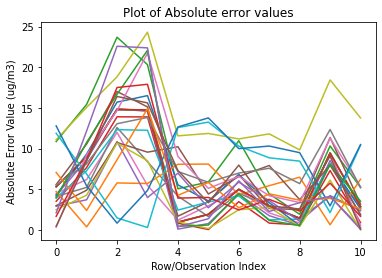

In [48]:
import matplotlib.pyplot as plt

# Row index for plotting errors
row_index = np.arange(num_dfDKtest.index.size)

# Plot absolute error for every model
for e in error:
  plt.plot(row_index, np.abs(e))
plt.title("Plot of Absolute error values")
plt.xlabel("Row/Observation Index")
plt.ylabel("Absolute Error Value (ug/m3)")

Text(0.5, 1.0, 'Total sum of absolute error per model')

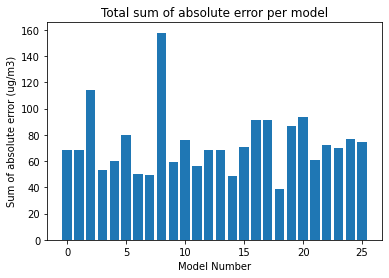

In [49]:
## Plot of absolute error sum
# Number of model for x-axis
mod_num = np.arange(len(error))
plt.bar(mod_num, error_sum)
plt.xlabel("Model Number")
plt.ylabel("Sum of absolute error (ug/m3)")
plt.title("Total sum of absolute error per model")

Text(0.5, 1.0, 'Root Mean Squared Error per model')

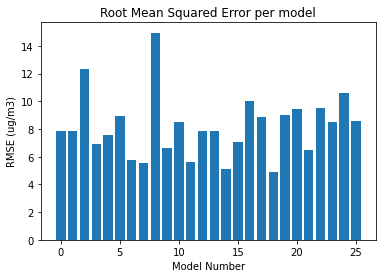

In [50]:
# Root Mean Squared Error
# RMSE = sqrt(sum(error[i])/N)
RMSE = []
#print(len(error))
#print(np.array(error[i])**2)
for i in range(len(error)):
  RMSE.append(np.sqrt(np.mean(np.array(error[i])**2, dtype=np.float64)))

mod_num = np.arange(len(error))
plt.bar(mod_num, RMSE)
plt.xlabel("Model Number")
plt.ylabel("RMSE (ug/m3)")
plt.title("Root Mean Squared Error per model")

The Mean Absolute Percent Error is another indicator of each model's accuracy. This value is calculated as the mean of the absolute percentage error of each model's predictions:\
$100/N {\times} \Sigma$<sup>$N-1$</sup><sub>$t=0$</sub>$ (|Error$<sub>t</sub>$|/Observation$<sub>t</sub>$)$

Text(0.5, 1.0, 'Mean Absolute Percentage Error per model')

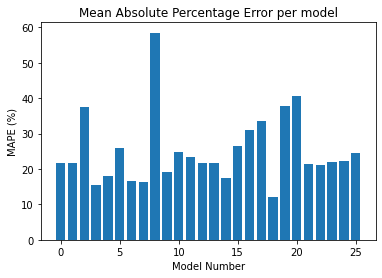

In [51]:
# Mean Absolute Percent Error
err_percent = []

for m in range(len(error)):
  err_percent.append([])
  for i in range(num_dfDKtest.index.size):
    err_percent[m].append(error[m][i]/num_dfDKtest.iloc[i][3]*100)

MAPE = []

for i in range(len(err_percent)):
  MAPE.append(np.mean(np.array(np.abs(err_percent[i])), dtype=np.float64))

mod_num = np.arange(len(error))
plt.bar(mod_num, MAPE)
plt.xlabel("Model Number")
plt.ylabel("MAPE (%)")
plt.title("Mean Absolute Percentage Error per model")

We can thus conclude that certain models were more accurate than others. The 5 models with the smallest RMSE values and the models with the 5 smallest MAPE are calculated and compared below:

In [52]:
kRMSE = np.argsort(RMSE)
kMAPE = np.argsort(MAPE)
print("Models with smallest RMSE values:", kRMSE[:5])
print("Models with lowest MAPE percentages:", kMAPE[:5])

kRMSE_set = set(kRMSE[:5])
kMAPE_set = set(kMAPE[:5])
if len(kRMSE_set.intersection(kMAPE_set))>0:
  print("Common models:",kRMSE_set.intersection(kMAPE_set))
else:
  print("There are no common models in the 'most accurate' 5 models of both criteria")

Models with smallest RMSE values: [18 14  7 11  6]
Models with lowest MAPE percentages: [18  3  7  6 14]
Common models: {18, 14, 6, 7}


We notice that 4 models are common to both sets of evaluation: Model 18 has the 2nd smallest RMSE value and the smallest MAPE value. It is reprinted down below:

In [53]:
print("Standout model:",OLS_model_lbl[18])
OLS_model[18].summary()

Standout model: PM_month_model[4]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     13.57
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.75e-12
Time:                        18:25:26   Log-Likelihood:                -345.41
No. Observations:                 106   AIC:                             706.8
Df Residuals:                      98   BIC:                             728.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0619      9.253      0.007      0.995     -18.300      18.424
CO (ppm)         2.7979      3.577      0.782      0.436      -4.301       9.896
NO2 (ppb)        0.4771      0.118      4.042      0.000       0.243       0.711
O3 (ppb)         0.1901      0.086      2.222      0.029       0.020       0.360
SO2 (ppb)        0.2837      0.209      1.358      0.178      -0.131       0.698
Amb Temp (C)     0.2889      0.430      0.672      0.503      -0.565       1.142
Rel Hum (%)      0.2250      0.073      3.090      0.003       0.081       0.370
WS (m/s)        -4.4065      1.063     -4.146      0.000      -6.516      -2.297
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.806
Skew:                           0.411   Prob(JB):                        0.149
Kurtosis:                       3.432   Cond. No.                         850.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perhaps surprisingly, based on the limited test set available for the year of 2020, the model trained using only data from the months of May from 2015-2019 was the most accurate in predicting the concentration of PM<sub>2.5</sub> in the atmosphere.

However, other standout models include models number 6, 7, and 14, as they appear in both lists of lowest error. We will also include Model 3 in this list, as it had the second lowest MAPE value of all.

In [54]:
print("Model 3:",OLS_model_lbl[3])
print("Model 6:",OLS_model_lbl[6])
print("Model 7:",OLS_model_lbl[7])
print("Model 14:",OLS_model_lbl[14])

Model 3: PM_DAvg_model_fill
Model 6: PM_2016_model
Model 7: PM_2017_model
Model 14: PM_month_model[0]


The distance between the Diepkloof Station and the international AERONET ground station in Pretoria is approximately 63 km. This is a significant distance away and time constraints meant that MODIS 550nm was not feasible to acquire for this study. 

We will investigate the effect of regressing with these values from AERONET as per the research done in Beijing, but we have no other data to verify it against due to being unable to retrieve and extract data from MODIS in a timely/readable manner. In any case, we will verify if modelling with these values yield any meaningful insights. The distance between the two points of measurement are likely to introduce more random variablity, but this is unavoidable due to the circumstances of available data collection points.

In [55]:
#uploaded = files.upload()

# replace the id with id of file, in this case ID of Pretoria_AERONET_csv.csv
#downloaded = drive.CreateFile({'id':"1R2fTUH8mHcNdtEwKJXK9JD3a0NjoCJ6f"}) 
#downloaded.GetContentFile('Pretoria_AERONET_csv.csv')

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
#print("Downloaded Pretoria_AERONET_csv.csv from GoogleDrive.")

## Direct Upload
#dfAERO = pd.read_csv(io.BytesIO(uploaded['Pretoria_AERONET_csv.csv']))

## PyDrive
#dfAERO = pd.read_csv('Pretoria_AERONET_csv.csv')

## GitHub Direct
url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/Pretoria_AERONET_csv.csv"
dfAERO = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [56]:
# Replace negative numbers and 0 with NaN
dfAERO = dfAERO.mask((dfAERO['AOD_675nm'] <0) | (dfAERO['AOD_500nm'] <0))
dfAERO.describe()

,YYYY,MM,DD,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,AOD_Empty,AOD_Empty.1,AOD_Empty.2,AOD_Empty.3,AOD_Empty.4,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,440-675_Angstrom_Exponent[Polar],N[AOD_1640nm],N[AOD_1020nm],N[AOD_870nm],N[AOD_865nm],N[AOD_779nm],N[AOD_675nm],N[AOD_667nm],N[AOD_620nm],N[AOD_560nm],N[AOD_555nm],N[AOD_551nm],N[AOD_532nm],N[AOD_531nm],N[AOD_510nm],N[AOD_500nm],N[AOD_490nm],N[AOD_443nm],N[AOD_440nm],N[AOD_412nm],N[AOD_400nm],N[AOD_380nm],N[AOD_340nm],N[Precipitable_Water(cm)],N[AOD_681nm],N[AOD_709nm],N[AOD_Empty],N[AOD_Empty].1,N[AOD_Empty].2,N[AOD_Empty].3,N[AOD_Empty].4,N[440-870_Angstrom_Exponent],N[380-500_Angstrom_Exponent],N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],AERONET_Instrument_Number,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.0,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.0,1668.000000,1.668000e+03,1.668000e+03,1668.0
mean,2014.136691,6.852518,15.838129,193.259592,-207.197342,0.064150,0.080404,-999.0,-999.0,0.117430,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.195357,-999.0,-999.0,0.236732,-999.0,-999.0,-0.306045,-2.660945,1.340346,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.522887,1.479823,1.598573,1.518654,0.801914,-999.0,27.587530,35.140887,35.160671,0.0,0.0,35.134892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.145683,0.0,0.0,35.149281,0.0,0.0,35.066547,34.656475,35.161871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.161871,35.147482,35.154077,35.161271,35.071942,0.0,616.858513,-2.575661e+01,2.827972e+01,1449.0
std,2.107324,3.395692,8.727642,103.920349,405.200060,0.036015,0.048053,0.0,0.0,0.077330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130773,0.0,0.0,0.157187,0.0,0.0,24.468525,54.648656,0.638778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263706,0.239177,0.224963,0.290635,24.496136,0.0,22.651903,19.692140,19.696481,0.0,0.0,19.689714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.693080,0.0,0.0,19.696068,0.0,0.0,19.706357,19.599104,19.695466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.695466,19.694970,19.694905,19.696217,19.704801,0.0,140.776215,3.233939e-13,5.366206e-13,0.0
min,2011.000000,1.000000,1.000000,1.000000,-999.000000,0.012150,0.010317,-999.0,-999.0,0.016400,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.023178,-999.0,-999.0,0.025870,-999.0,-999.0,-999.000000,-999.000000,0.155207,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.371221,-0.098298,0.522042,0.312512,-999.000000,-999.0,0.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,156.000000,-2.575661e+01,2.827972e+01,1449.0
25%,2012.000000,4.000000,8.000000,109.000000,0.015245,0.040147,0.048396,-999.0,-999.0,0.066528,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.107176,-999.0,-999.0,0.129531,-999.0,-999.0,0.162926,0.187896,0.785348,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.377885,1.339603,1.481143,1.344368,1.246128,-999.0,3.00000

The dataset available only has values for AOD at wavelength 675 nm (red) and wavelength 500 nm (green). The investigation done in Beijing used the 550nm wavelength available from the MODIS satellite. They found that interpolating values from the AERONET network yielded a highly correlated scaled value. That is, the interpolated value was almost exactly the same as the value from MODIS, but scaled by approximately 1,23. We will first investigate using the same interpolated wavelength. Namely:\
$AOD$<sub>$550$</sub>$ = AOD$<sub>$500$+</sub>$[(AOD$<sub>$675$</sub>$ - AOD$<sub>$500$</sub>$)/(675 - 500)] {\times}50$

We will also append the 500nm wavelength measurement for future use. This is a common wavelength for reporting purposes.

In [57]:
# Interpolate AOD_550nm using linear interpolation
AOD_550 = np.array(dfAERO["AOD_500nm"])+(((np.array(dfAERO["AOD_675nm"])-np.array(dfAERO["AOD_500nm"]))/175)*50)

#from scipy.interpolate import interp1d
#aod_cols = ["AOD_1640nm", "AOD_1020nm", "AOD_870nm", "AOD_675nm", "AOD_500nm", 
#            "AOD_440nm", "AOD_380nm", "AOD_340nm"]
#x_nm = np.array([1640, 1020 ,870, 675, 500, 440, 380, 340])
#y_aod = dfAERO[aod_cols].iloc[1]
#f = interp1d(x_nm, y_aod)
#f2 = interp1d(x_nm, y_aod, kind='cubic')
#print(AOD_550)

#xnew = np.linspace(340, 1640, num=41, endpoint=True)
#print((f(550)-f2(550))/f2(550)*100)
#print(AOD_550[1]-f(550))
#plt.plot(x_nm, y_aod, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
#plt.legend(['data', 'linear', 'cubic'], loc='best')

dfAERO.insert(3,"AOD_550nm",AOD_550)
dfAERO.describe()

,YYYY,MM,DD,AOD_550nm,Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,AOD_667nm,AOD_620nm,AOD_560nm,AOD_555nm,AOD_551nm,AOD_532nm,AOD_531nm,AOD_510nm,AOD_500nm,AOD_490nm,AOD_443nm,AOD_440nm,AOD_412nm,AOD_400nm,AOD_380nm,AOD_340nm,Precipitable_Water(cm),AOD_681nm,AOD_709nm,AOD_Empty,AOD_Empty.1,AOD_Empty.2,AOD_Empty.3,AOD_Empty.4,440-870_Angstrom_Exponent,380-500_Angstrom_Exponent,440-675_Angstrom_Exponent,500-870_Angstrom_Exponent,340-440_Angstrom_Exponent,...,N[AOD_1640nm],N[AOD_1020nm],N[AOD_870nm],N[AOD_865nm],N[AOD_779nm],N[AOD_675nm],N[AOD_667nm],N[AOD_620nm],N[AOD_560nm],N[AOD_555nm],N[AOD_551nm],N[AOD_532nm],N[AOD_531nm],N[AOD_510nm],N[AOD_500nm],N[AOD_490nm],N[AOD_443nm],N[AOD_440nm],N[AOD_412nm],N[AOD_400nm],N[AOD_380nm],N[AOD_340nm],N[Precipitable_Water(cm)],N[AOD_681nm],N[AOD_709nm],N[AOD_Empty],N[AOD_Empty].1,N[AOD_Empty].2,N[AOD_Empty].3,N[AOD_Empty].4,N[440-870_Angstrom_Exponent],N[380-500_Angstrom_Exponent],N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],AERONET_Instrument_Number,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,...,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.0,1668.000000,1.668000e+03,1.668000e+03,1668.0
mean,2014.136691,6.852518,15.838129,0.173092,193.259592,-207.197342,0.064150,0.080404,-999.0,-999.0,0.117430,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.195357,-999.0,-999.0,0.236732,-999.0,-999.0,-0.306045,-2.660945,1.340346,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.522887,1.479823,1.598573,1.518654,0.801914,...,27.587530,35.140887,35.160671,0.0,0.0,35.134892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.145683,0.0,0.0,35.149281,0.0,0.0,35.066547,34.656475,35.161871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.161871,35.147482,35.154077,35.161271,35.071942,0.0,616.858513,-2.575661e+01,2.827972e+01,1449.0
std,2.107324,3.395692,8.727642,0.115399,103.920349,405.200060,0.036015,0.048053,0.0,0.0,0.077330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130773,0.0,0.0,0.157187,0.0,0.0,24.468525,54.648656,0.638778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263706,0.239177,0.224963,0.290635,24.496136,...,22.651903,19.692140,19.696481,0.0,0.0,19.689714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.693080,0.0,0.0,19.696068,0.0,0.0,19.706357,19.599104,19.695466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.695466,19.694970,19.694905,19.696217,19.704801,0.0,140.776215,3.233939e-13,5.366206e-13,0.0
min,2011.000000,1.000000,1.000000,0.021241,1.000000,-999.000000,0.012150,0.010317,-999.0,-999.0,0.016400,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.023178,-999.0,-999.0,0.025870,-999.0,-999.0,-999.000000,-999.000000,0.155207,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.371221,-0.098298,0.522042,0.312512,-999.000000,...,0.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,156.000000,-2.575661e+01,2.827972e+01,1449.0
25%,2012.000000,4.000000,8.000000,0.096132,109.000000,0.015245,0.040147,0.048396,-999.0,-999.0,0.066528,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.107176,-999.0,-999.0,0.129531,-999.0,-999.0,0.162926,0.187896,0.785348,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,1.377885,1.339603,1.481143,1.344368,1.2

And now that we've interpolated AOD<sub>550nm</sub>, we must merge this data with previously tabulated values. The keys for this merge will be the Date columns (**Year**/**YYYY**, **Month**/**MM**, and **Day**/**DD**)

In [58]:
dfAERO_min = dfAERO[["YYYY","MM","DD","AOD_500nm","AOD_550nm"]]  # Minimise to columns of interest
#print(dfAERO_min)
# Perform a left merge onto dfDK_AOD
dfDK_AOD = nan_dfDK.copy()
dfDK_AOD = pd.merge(dfDK_AOD, dfAERO_min, how="left", left_on=["Year","Month", "Day"],
                    right_on = ["YYYY","MM","DD"]).drop(columns=["YYYY","MM","DD"])
dfDK_AOD.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),AOD_500nm,AOD_550nm
count,1825.000000,1825.000000,1825.000000,1483.000000,1578.000000,1619.000000,1643.000000,1545.000000,1643.000000,1643.000000,1580.000000,647.000000,647.000000
mean,2017.000000,6.520548,15.719452,23.485502,0.595054,23.431130,26.706026,4.586408,18.156421,45.083384,5.558228,0.196327,0.174240
std,1.414601,3.448038,8.796878,10.675512,0.237887,8.785561,10.817470,3.504874,4.404958,16.170106,21.717160,0.128318,0.113703
min,2015.000000,1.000000,1.000000,0.000000,0.078400,5.000000,5.000000,0.000000,6.000000,4.000000,0.100000,0.027045,0.024115
25%,2016.000000,4.000000,8.000000,16.000000,0.423200,17.000000,19.000000,2.000000,15.000000,33.000000,2.000000,0.106710,0.096813
50%,2017.000000,7.000000,16.000000,22.000000,0.559300,22.000000,26.000000,4.000000,19.000000,46.000000,2.600000,0.164781,0.147877
75%,2018.000000,10.000000,23.000000,29.000000,0.737825,28.000000,34.000000,6.000000,21.000000,58.000000,3.300000,0.249595,0.221151
max,2019.000000,12.000000,31.000000,86.000000,1.551100,57.000000,68.000000,39.000000,29.000000,83.000000,239.100000,1.102598,1.005322


In [59]:
AOD_model = [] # List of AOD models for tracking
AOD_model_lbls = [] # List of model labels/variable names for tracking

# Regression including Aerosol Optical Depth (550nm)
Y = "PM2.5 (ug/m3)"
Y_ols_aod = dfDK_AOD[Y]
x_col_aod_550 = dfDK_AOD.columns.values.tolist()[4:]  # Exclude Date columns, and PM2.5
if "WD (Deg)" in x_col_aod_550:
  x_col_aod_550.remove("WD (Deg)")  # Not interested in wind direction
x_col_aod_550.remove("AOD_500nm") # First using only 550nm interpolation
#print(x_col_names)

X_ols_aod_550 = dfDK_AOD[x_col_aod_550]
#print(X_ols_aod)
X_ols_aod_550 = sm.add_constant(X_ols_aod_550)

PM_ols_aod_550 = sm.OLS(Y_ols_aod,X_ols_aod_550,missing='drop').fit()
AOD_model.append(PM_ols_aod_550)
AOD_model_lbls.append("PM_ols_aod_550")
PM_ols_aod_550.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     30.98
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           5.17e-38
Time:                        18:25:27   Log-Likelihood:                -1475.9
No. Observations:                 424   AIC:                             2970.
Df Residuals:                     415   BIC:                             3006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.8478      3.652     -1.875      0.062     -14.027       0.332
CO (ppm)         2.3155      2.927      0.791      0.429      -3.437       8.068
NO2 (ppb)        0.6075      0.070      8.650      0.000       0.469       0.746
O3 (ppb)        -0.0646      0.039     -1.638      0.102      -0.142       0.013
SO2 (ppb)        0.0489      0.137      0.358      0.720      -0.219       0.317
Amb Temp (C)     0.0740      0.124      0.596      0.552      -0.170       0.318
Rel Hum (%)      0.1688      0.031      5.436      0.000       0.108       0.230
WS (m/s)         0.0187      0.016      1.199      0.231      -0.012       0.049
AOD_550nm       10.2068      4.037      2.528      0.012       2.271      18.143
==============================================================================
Omnibus:                       55.306   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           0.738   Prob(JB):                     3.29e-24
Kurtosis:                       4.986   Cond. No.                         674.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing the models by varying which wavelength of AOD used yields:

In [60]:
# Regression including Aerosol Optical Depth (500nm)
Y = "PM2.5 (ug/m3)"
Y_ols_aod = dfDK_AOD[Y]
x_col_aod_500 = dfDK_AOD.columns.values.tolist()[4:]  # Exclude Date columns, and PM2.5
if "WD (Deg)" in x_col_aod_500:
  x_col_aod_500.remove("WD (Deg)")  # Not interested in wind direction
x_col_aod_500.remove("AOD_550nm") # Second using 500nm reported measurement
#print(x_col_names)

X_ols_aod_500 = dfDK_AOD[x_col_aod_500]
#print(X_ols_aod)
X_ols_aod_500 = sm.add_constant(X_ols_aod_500)

PM_ols_aod_500 = sm.OLS(Y_ols_aod,X_ols_aod_500,missing='drop').fit()
AOD_model.append(PM_ols_aod_500)
AOD_model_lbls.append("PM_ols_aod_500")
PM_ols_aod_500.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     31.00
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           4.92e-38
Time:                        18:25:27   Log-Likelihood:                -1475.9
No. Observations:                 424   AIC:                             2970.
Df Residuals:                     415   BIC:                             3006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.7984      3.652     -1.861      0.063     -13.977       0.381
CO (ppm)         2.3205      2.926      0.793      0.428      -3.432       8.073
NO2 (ppb)        0.6071      0.070      8.644      0.000       0.469       0.745
O3 (ppb)        -0.0649      0.039     -1.647      0.100      -0.142       0.013
SO2 (ppb)        0.0489      0.136      0.358      0.720      -0.219       0.317
Amb Temp (C)     0.0730      0.124      0.588      0.557      -0.171       0.317
Rel Hum (%)      0.1682      0.031      5.410      0.000       0.107       0.229
WS (m/s)         0.0189      0.016      1.212      0.226      -0.012       0.050
AOD_500nm        9.1160      3.576      2.549      0.011       2.086      16.146
==============================================================================
Omnibus:                       55.262   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.058
Skew:                           0.737   Prob(JB):                     3.43e-24
Kurtosis:                       4.985   Cond. No.                         612.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The AERONET data only contains data up to May 1st 2018. If we thus regress using an annual model for 2016 and 2017, we obtain the following results:

In [61]:
# Regression including Aerosol Optical Depth (550nm)
Y = "PM2.5 (ug/m3)"
Y_ols_aod_2016 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2016)])[Y]
Mean_2016 = np.mean(Y_ols_aod_2016)
print("Mean 2016:",Mean_2016)

X_ols_aod_550_2016 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2016)])[x_col_aod_550]
#print(X_ols_aod)
X_ols_aod_550_2016 = sm.add_constant(X_ols_aod_550_2016)

PM_ols_aod_550_2016 = sm.OLS(Y_ols_aod_2016,X_ols_aod_550_2016,missing='drop').fit()
AOD_model.append(PM_ols_aod_550_2016)
AOD_model_lbls.append("PM_ols_aod_550_2016")
PM_ols_aod_550_2016.summary()

Mean 2016: 23.907042253521126


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2.869
Date:                Mon, 29 Jun 2020   Prob (F-statistic):             0.0134
Time:                        18:25:27   Log-Likelihood:                -132.37
No. Observations:                  47   AIC:                             282.7
Df Residuals:                      38   BIC:                             299.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.0344     15.152     -0.926      0.360     -44.707      16.638
CO (ppm)        -0.8566      6.896     -0.124      0.902     -14.817      13.104
NO2 (ppb)        0.0153      0.239      0.064      0.949      -0.469       0.499
O3 (ppb)        -0.3443      0.116     -2.974      0.005      -0.579      -0.110
SO2 (ppb)        0.9822      0.587      1.673      0.103      -0.206       2.171
Amb Temp (C)     1.4007      0.454      3.086      0.004       0.482       2.319
Rel Hum (%)      0.2369      0.106      2.241      0.031       0.023       0.451
WS (m/s)        -0.0182      0.011     -1.655      0.106      -0.040       0.004
AOD_550nm        6.1989     10.474      0.592      0.557     -15.005      27.403
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.451
Skew:                           0.052   Prob(JB):                        0.798
Kurtosis:                       2.531   Cond. No.                     2.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# 2016 model including Aerosol Optical Depth (500nm)
Y = "PM2.5 (ug/m3)"
Y_ols_aod_2016 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2016)])[Y]
Mean_2016 = np.mean(Y_ols_aod_2016)
print("Mean 2016:",Mean_2016)
#print(x_col_names)

X_ols_aod_500_2016 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2016)])[x_col_aod_500]
#print(X_ols_aod)
X_ols_aod_500_2016 = sm.add_constant(X_ols_aod_500_2016)

PM_ols_aod_500_2016 = sm.OLS(Y_ols_aod_2016,X_ols_aod_500_2016,missing='drop').fit()
AOD_model.append(PM_ols_aod_500_2016)
AOD_model_lbls.append("PM_ols_aod_500_2016")
PM_ols_aod_500_2016.summary()

Mean 2016: 23.907042253521126


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2.867
Date:                Mon, 29 Jun 2020   Prob (F-statistic):             0.0135
Time:                        18:25:27   Log-Likelihood:                -132.38
No. Observations:                  47   AIC:                             282.8
Df Residuals:                      38   BIC:                             299.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -13.8531     15.121     -0.916      0.365     -44.464      16.758
CO (ppm)        -0.8710      6.896     -0.126      0.900     -14.830      13.088
NO2 (ppb)        0.0159      0.239      0.066      0.947      -0.468       0.500
O3 (ppb)        -0.3450      0.116     -2.971      0.005      -0.580      -0.110
SO2 (ppb)        0.9797      0.587      1.668      0.103      -0.209       2.168
Amb Temp (C)     1.3962      0.452      3.087      0.004       0.481       2.312
Rel Hum (%)      0.2362      0.106      2.232      0.032       0.022       0.450
WS (m/s)        -0.0181      0.011     -1.649      0.107      -0.040       0.004
AOD_500nm        5.3802      9.219      0.584      0.563     -13.283      24.043
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.450
Skew:                           0.052   Prob(JB):                        0.798
Kurtosis:                       2.532   Cond. No.                     2.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# 2017 Annual model with AOD (550nm)
Y_ols_aod_2017 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2017)])[Y]
Mean_2017 = np.mean(Y_ols_aod_2017)
print("Mean 2017:",Mean_2017)
X_ols_aod_550_2017 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2017)])[x_col_aod_550]
#print(X_ols_aod)
X_ols_aod_550_2017 = sm.add_constant(X_ols_aod_550_2017)

PM_ols_aod_550_2017 = sm.OLS(Y_ols_aod_2017,X_ols_aod_550_2017,missing='drop').fit()
AOD_model.append(PM_ols_aod_550_2017)
AOD_model_lbls.append("PM_ols_aod_550_2017")
PM_ols_aod_550_2017.summary()

Mean 2017: 20.552036199095024


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     13.36
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.72e-13
Time:                        18:25:27   Log-Likelihood:                -444.63
No. Observations:                 123   AIC:                             907.3
Df Residuals:                     114   BIC:                             932.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.6368      9.374     -0.815      0.417     -26.207      10.933
CO (ppm)        -9.8556      6.400     -1.540      0.126     -22.533       2.822
NO2 (ppb)        0.7039      0.161      4.364      0.000       0.384       1.023
O3 (ppb)         0.2272      0.127      1.796      0.075      -0.023       0.478
SO2 (ppb)        0.0171      0.250      0.068      0.946      -0.479       0.513
Amb Temp (C)     0.0923      0.287      0.322      0.748      -0.476       0.660
Rel Hum (%)      0.3211      0.059      5.486      0.000       0.205       0.437
WS (m/s)        -3.3028      1.284     -2.572      0.011      -5.847      -0.758
AOD_550nm       10.7172      9.183      1.167      0.246      -7.475      28.909
==============================================================================
Omnibus:                       15.708   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.741
Skew:                           0.816   Prob(JB):                     0.000140
Kurtosis:                       3.894   Cond. No.                         731.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# 2017 Annual model with AOD (500nm)
Y_ols_aod_2017 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2017)])[Y]
Mean_2017 = np.mean(Y_ols_aod_2017)
print("Mean 2017:",Mean_2017)
X_ols_aod_500_2017 = (dfDK_AOD.loc[(dfDK_AOD["Year"]==2017)])[x_col_aod_500]
#print(X_ols_aod)
X_ols_aod_500_2017 = sm.add_constant(X_ols_aod_500_2017)

PM_ols_aod_500_2017 = sm.OLS(Y_ols_aod_2017,X_ols_aod_500_2017,missing='drop').fit()
AOD_model.append(PM_ols_aod_500_2017)
AOD_model_lbls.append("PM_ols_aod_500_2017")
PM_ols_aod_500_2017.summary()

Mean 2017: 20.552036199095024


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     13.37
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.72e-13
Time:                        18:25:27   Log-Likelihood:                -444.63
No. Observations:                 123   AIC:                             907.3
Df Residuals:                     114   BIC:                             932.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.5832      9.378     -0.809      0.420     -26.160      10.994
CO (ppm)        -9.8411      6.400     -1.538      0.127     -22.519       2.836
NO2 (ppb)        0.7037      0.161      4.363      0.000       0.384       1.023
O3 (ppb)         0.2267      0.127      1.792      0.076      -0.024       0.477
SO2 (ppb)        0.0172      0.250      0.069      0.945      -0.479       0.513
Amb Temp (C)     0.0911      0.287      0.318      0.751      -0.477       0.659
Rel Hum (%)      0.3207      0.059      5.471      0.000       0.205       0.437
WS (m/s)        -3.2978      1.284     -2.569      0.012      -5.841      -0.755
AOD_500nm        9.3931      8.040      1.168      0.245      -6.535      25.321
==============================================================================
Omnibus:                       15.703   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.737
Skew:                           0.815   Prob(JB):                     0.000141
Kurtosis:                       3.895   Cond. No.                         720.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We also wish to analyse a frame where NaNs are filled by the mean value of its column:

In [65]:
dfDK_AOD_fill = dfDK_AOD.copy()
mean_val = dfDK_AOD_fill.mean()
values = {}
for col in dfDK_AOD.columns.values.tolist():
  values[col] = mean_val[col]
#print(values)

dfDK_AOD_fill = dfDK_AOD_fill.fillna(value=values)
dfDK_AOD_fill.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),AOD_500nm,AOD_550nm
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,2017.000000,6.520548,15.719452,23.485502,0.595054,23.431130,26.706026,4.586408,18.156421,45.083384,5.558228,0.196327,0.174240
std,1.414601,3.448038,8.796878,9.622777,0.221194,8.274587,10.263604,3.224658,4.179419,15.342179,20.206062,0.076365,0.067667
min,2015.000000,1.000000,1.000000,0.000000,0.078400,5.000000,5.000000,0.000000,6.000000,4.000000,0.100000,0.027045,0.024115
25%,2016.000000,4.000000,8.000000,17.000000,0.443900,18.000000,20.000000,2.000000,16.000000,35.000000,2.100000,0.196327,0.174240
50%,2017.000000,7.000000,16.000000,23.485502,0.595054,23.000000,26.706026,4.000000,18.156421,45.083384,2.800000,0.196327,0.174240
75%,2018.000000,10.000000,23.000000,27.000000,0.706800,27.000000,33.000000,5.000000,21.000000,56.000000,3.800000,0.196327,0.174240
max,2019.000000,12.000000,31.000000,86.000000,1.551100,57.000000,68.000000,39.000000,29.000000,83.000000,239.100000,1.102598,1.005322


In [66]:
# Regression including Aerosol Optical Depth (550nm)
Y = "PM2.5 (ug/m3)"
Y_ols_aod_fill = dfDK_AOD_fill[Y]

X_ols_aod_550_fill = dfDK_AOD_fill[x_col_aod_550]
X_ols_aod_550_fill = sm.add_constant(X_ols_aod_550_fill)

PM_ols_aod_550_fill = sm.OLS(Y_ols_aod_fill,X_ols_aod_550_fill,missing='drop').fit()
AOD_model.append(PM_ols_aod_550_fill)
AOD_model_lbls.append("PM_ols_aod_550_fill")
PM_ols_aod_550_fill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     52.17
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.24e-76
Time:                        18:25:27   Log-Likelihood:                -6532.4
No. Observations:                1825   AIC:                         1.308e+04
Df Residuals:                    1816   BIC:                         1.313e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7359      1.904      0.386      0.699      -2.999       4.470
CO (ppm)        10.4816      1.124      9.328      0.000       8.278      12.686
NO2 (ppb)        0.2768      0.033      8.466      0.000       0.213       0.341
O3 (ppb)        -0.0466      0.023     -2.012      0.044      -0.092      -0.001
SO2 (ppb)        0.3352      0.073      4.610      0.000       0.193       0.478
Amb Temp (C)     0.1995      0.058      3.412      0.001       0.085       0.314
Rel Hum (%)      0.1033      0.015      6.883      0.000       0.074       0.133
WS (m/s)        -0.0209      0.010     -2.030      0.043      -0.041      -0.001
AOD_550nm        9.0086      3.027      2.976      0.003       3.072      14.945
==============================================================================
Omnibus:                      467.655   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2051.348
Skew:                           1.161   Prob(JB):                         0.00
Kurtosis:                       7.646   Cond. No.                         931.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Regression including Aerosol Optical Depth (500nm)
Y = "PM2.5 (ug/m3)"
Y_ols_aod_fill = dfDK_AOD_fill[Y]

X_ols_aod_500_fill = dfDK_AOD_fill[x_col_aod_500]
X_ols_aod_500_fill = sm.add_constant(X_ols_aod_500_fill)

PM_ols_aod_500_fill = sm.OLS(Y_ols_aod_fill,X_ols_aod_500_fill,missing='drop').fit()
AOD_model.append(PM_ols_aod_500_fill)
AOD_model_lbls.append("PM_ols_aod_500_fill")
PM_ols_aod_500_fill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     52.17
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.19e-76
Time:                        18:25:28   Log-Likelihood:                -6532.3
No. Observations:                1825   AIC:                         1.308e+04
Df Residuals:                    1816   BIC:                         1.313e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7475      1.903      0.393      0.695      -2.985       4.480
CO (ppm)        10.4795      1.124      9.326      0.000       8.276      12.683
NO2 (ppb)        0.2768      0.033      8.466      0.000       0.213       0.341
O3 (ppb)        -0.0468      0.023     -2.018      0.044      -0.092      -0.001
SO2 (ppb)        0.3351      0.073      4.609      0.000       0.192       0.478
Amb Temp (C)     0.1994      0.058      3.409      0.001       0.085       0.314
Rel Hum (%)      0.1032      0.015      6.874      0.000       0.074       0.133
WS (m/s)        -0.0208      0.010     -2.026      0.043      -0.041      -0.001
AOD_500nm        8.0046      2.683      2.983      0.003       2.742      13.267
==============================================================================
Omnibus:                      467.720   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2052.175
Skew:                           1.161   Prob(JB):                         0.00
Kurtosis:                       7.647   Cond. No.                         830.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#@title
from sklearn import preprocessing

#x = np.array(dfDK_AOD.index) 
#x = np.reshape(x, (len(x),1))
#x = np.hstack((x, dfDK_AOD.values)) #returns a numpy array
x = dfDK_AOD.values
min_max_scaler = preprocessing.MinMaxScaler()
#scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
#x_scaled = scaler.fit_transform(x)
dfDK_scaled = pd.DataFrame(x_scaled)
#nan_dfDK.head()
col_dict={}
#col_dict[0]="Index"
for i in range(len(dfDK_AOD.columns)):
  col_dict[dfDK_scaled.columns[i]]= dfDK_AOD.columns[i]

#print(col_dict)
dfDK_scaled = dfDK_scaled.rename(columns=col_dict)
#dfDK_scaled.set_index("Index")
dfDK_scaled.head()

,Year,Month,Day,PM2.5 (ug/m3),CO (ppm),NO2 (ppb),O3 (ppb),SO2 (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),AOD_500nm,AOD_550nm
0,0.0,0.0,0.000000,0.174419,0.242616,0.269231,0.507937,0.000000,0.478261,0.746835,0.007113,0.087702,0.082824
1,0.0,0.0,0.033333,0.174419,0.199769,0.230769,0.523810,0.076923,0.478261,0.746835,0.013808,0.054169,0.052523
2,0.0,0.0,0.066667,0.139535,0.184423,0.288462,0.555556,0.256410,0.608696,0.544304,0.008787,0.072034,0.069829
3,0.0,0.0,0.100000,0.197674,0.246758,0.269231,0.634921,0.025641,0.608696,0.544304,0.010460,0.031629,0.030456
4,0.0,0.0,0.133333,0.372093,0.313574,0.346154,0.587302,0.051282,0.608696,0.620253,0.010042,0.142396,0.136539


In [69]:
#@title
# Obtain Y and X variables. Y variable is PM2.5 concentration, X is other fields
# Y variable graphing particulate matter (PM) for Daily Average readings
Y_ols_scaled = nan_dfDK["PM2.5 (ug/m3)"]
x_scaled_cols = list(dfDK_scaled.columns)
x_scaled_cols.remove("PM2.5 (ug/m3)")
x_scaled_cols.remove("Year")
x_scaled_cols.remove("Month")
x_scaled_cols.remove("Day")
x_scaled_cols.remove("AOD_500nm") # Only 550nm for now
#print(x_scaled_cols)

# Uninterested in direction of wind, only speed at this time
if "WD (Deg)" in x_scaled_cols:
  x_scaled_cols.remove("WD (Deg)")
X_ols_scaled = dfDK_scaled[x_scaled_cols]

# Add constant
X_ols_scaled = sm.add_constant(X_ols_scaled, prepend=True)

PM_scaled_model = sm.OLS(Y_ols_scaled, X_ols_scaled ,missing='drop').fit()
AOD_model.append(PM_scaled_model)
AOD_model_lbls.append("PM_scaled_model")
PM_scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     30.98
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           5.17e-38
Time:                        18:25:28   Log-Likelihood:                -1475.9
No. Observations:                 424   AIC:                             2970.
Df Residuals:                     415   BIC:                             3006.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.5845      2.865     -0.902      0.368      -8.217       3.048
CO (ppm)         3.4100      4.310      0.791      0.429      -5.062      11.882
NO2 (ppb)       31.5899      3.652      8.650      0.000      24.411      38.769
O3 (ppb)        -4.0690      2.484     -1.638      0.102      -8.951       0.813
SO2 (ppb)        1.9072      5.324      0.358      0.720      -8.558      12.372
Amb Temp (C)     1.7013      2.855      0.596      0.552      -3.910       7.313
Rel Hum (%)     13.3379      2.453      5.436      0.000       8.515      18.161
WS (m/s)         4.4705      3.728      1.199      0.231      -2.858      11.799
AOD_550nm       10.0150      3.961      2.528      0.012       2.228      17.802
==============================================================================
Omnibus:                       55.306   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.142
Skew:                           0.738   Prob(JB):                     3.29e-24
Kurtosis:                       4.986   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No AOD Data from South Africa after 1 May 2018, so we cannot test these AOD models as we have the previous models. However, we still wish to further verify the application of this theory to predicting Air Quality measurements.

It is hypothesised that the lack of sufficient data from South African measurement sites, along with the distance between the Diepkloof station and the Pretoria AERONET station, are introducing uncertainties and variance.

To verify if using Daily Average measurements is a viable option at all, data from more complete sets are sought. Then the data for a year (mimicking the Beijing investigation) will be used in a regression as with models previously. For the purposes of this investigation, average daily data from the United states -- available from the Evironmental Protection Agency as pre-generated files (https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily) -- will be used. 

A brief investigation of a small subset of AERONET stations in the US showed that at the time of investigation (June 2020) a number of potential measurement locations did not have complete sets of data for the year 2019. Therefore, the year to be investigated is revised to 2018. Downloading Daily data from the link above for the year 2018 yields numerous files, one for each parameter (PM<sub>2.5</sub>, O<sub>3</sub>, CO, SO<sub>2</sub>, NO<sub>2</sub>, Wind Speed, Relative Humidity, and Temperature).

Compiling the data of each file into a single Excel Workbook allowed for the identification of Air Quality measurement stations that are common across all parameters of interest. Using this knowledge, an AERONET station nearby to one of these common stations was needed. An acceptable pair of stations can be found in Reno, Nevada. The AERONET station and the AQS station are approximately 1,75 km away from each other. This is suitable for comparison.

In [70]:
#uploaded = files.upload()

# replace the id with id of file, in this case ID of Reno3_2018.csv
#downloaded = drive.CreateFile({'id':"1Vf37zHeSNKltvcJcL-xBKuAvBuBvbmWc"}) 
#downloaded.GetContentFile('Reno3_2018.csv')

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))
#print("Downloaded Reno3_2018.csv from GoogleDrive.")

## Direct upload
#dfReno = pd.read_csv(io.BytesIO(uploaded['Reno3_2018.csv']))

## PyDrive
#dfReno = pd.read_csv('Reno3_2018.csv')

## GitHub Direct
url = "https://raw.githubusercontent.com/CJoffee/JBM3_EEE4022F/master/Reno3_2018.csv"
dfReno = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [71]:
dfReno.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO_1h (ppm),NO2_1h (ppb),O3_8h (ppb),SO2_1h (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),AOD_500nm
count,365.0,365.000000,365.000000,361.000000,365.000000,362.000000,365.000000,365.000000,365.000000,365.000000,365.000000,260.000000
mean,2018.0,6.526027,15.720548,8.054571,0.217169,12.826631,35.418047,0.239222,12.745285,43.437894,1.221795,0.100146
std,0.0,3.452584,8.808321,6.869622,0.117074,7.027825,14.596991,0.260210,8.859064,17.173693,0.417528,0.151728
min,2018.0,1.000000,1.000000,0.200000,0.026417,2.645833,1.231000,-0.136842,-4.537037,14.416667,0.308667,0.020527
25%,2018.0,4.000000,8.000000,4.700000,0.138292,7.384375,24.533000,0.079167,5.509259,28.166667,0.947435,0.039381
50%,2018.0,7.000000,16.000000,6.500000,0.174955,10.204167,36.765000,0.170833,11.689815,41.750000,1.157500,0.054461
75%,2018.0,10.000000,23.000000,9.200000,0.262542,17.252989,46.929000,0.304167,20.625000,57.583333,1.457592,0.098251
max,2018.0,12.000000,31.000000,50.800000,0.678417,36.679167,69.600000,1.758333,29.143518,85.916667,3.391046,1.478435


In [72]:
# List of data (non-date) columns
reno_data_cols = dfReno.columns.values.tolist()[3:]

# Drop and rejoin the whole list to remove non-numerics
dfReno = (dfReno.drop(dfReno.columns.values, axis=1)
         .join(dfReno.apply(pd.to_numeric, errors='coerce')))


# Replace negative numbers in SO2_1h with NaN
dfReno = dfReno.mask((dfReno['SO2_1h (ppb)'] <0))
dfReno.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO_1h (ppm),NO2_1h (ppb),O3_8h (ppb),SO2_1h (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),AOD_500nm
count,350.0,350.000000,350.000000,349.000000,350.000000,347.000000,350.000000,350.000000,350.000000,350.000000,350.000000,247.000000
mean,2018.0,6.542857,15.828571,8.175358,0.219459,12.841905,35.665143,0.251015,13.116578,42.753923,1.220061,0.101731
std,0.0,3.422853,8.824574,6.949144,0.118714,7.104135,14.716434,0.259151,8.813397,16.956611,0.410545,0.155174
min,2018.0,1.000000,1.000000,0.200000,0.026417,2.645833,1.231000,0.000000,-4.537037,14.416667,0.308667,0.020527
25%,2018.0,4.000000,8.000000,4.900000,0.138073,7.383333,24.868000,0.091667,5.584491,28.000000,0.945292,0.039378
50%,2018.0,7.000000,16.000000,6.600000,0.175500,10.125000,36.941000,0.178220,12.372685,40.791667,1.158572,0.055128
75%,2018.0,9.000000,23.000000,9.300000,0.265365,17.278676,47.191000,0.308333,20.949074,57.239583,1.462951,0.098271
max,2018.0,12.000000,31.000000,50.800000,0.678417,36.679167,69.600000,1.758333,29.143518,85.916667,3.391046,1.478435


Using the data in the above table, we can perform a regression as before.

In [73]:
# Regression including Aerosol Optical Depth
Y = "PM2.5 (ug/m3)"
Y_reno_2018 = dfReno[Y]
x_col_reno = reno_data_cols[1:] # Exclude PM2.5
#print(x_col_reno)

X_ols_reno_2018 = dfReno[x_col_reno]
#print(X_ols_aod)
X_ols_reno_2018 = sm.add_constant(X_ols_reno_2018)

PM_ols_reno_2018 = sm.OLS(Y_reno_2018,X_ols_reno_2018,missing='drop').fit()
AOD_model.append(PM_ols_reno_2018)
AOD_model_lbls.append("PM_ols_reno_2018")
PM_ols_reno_2018.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     233.5
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          2.99e-107
Time:                        18:25:28   Log-Likelihood:                -582.64
No. Observations:                 244   AIC:                             1183.
Df Residuals:                     235   BIC:                             1215.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.3127      2.794     -2.975      0.003     -13.818      -2.807
CO_1h (ppm)     26.1504      3.449      7.582      0.000      19.356      32.945
NO2_1h (ppb)     0.1232      0.074      1.661      0.098      -0.023       0.269
O3_8h (ppb)      0.0939      0.027      3.454      0.001       0.040       0.148
SO2_1h (ppb)     0.4001      1.157      0.346      0.730      -1.878       2.679
Amb Temp (C)     0.1737      0.043      4.068      0.000       0.090       0.258
Rel Hum (%)     -0.0061      0.022     -0.277      0.782      -0.050       0.037
WS (m/s)         0.8564      0.612      1.399      0.163      -0.350       2.062
AOD_500nm       31.0280      1.668     18.602      0.000      27.742      34.314
==============================================================================
Omnibus:                       55.393   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.332
Skew:                           0.147   Prob(JB):                    2.19e-213
Kurtosis:                      12.810   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is the kind of result that was expected based on the investigation done in Beijing. However, the conditon number is large, so we will attempt to scale the values down to minimise it.

In [74]:
x_reno = dfReno.values # Values of the data frame

# Scaler that will scale everything between 0 and 1
reno_min_max_scaler = preprocessing.MinMaxScaler() 

x_reno_s = reno_min_max_scaler.fit_transform(x_reno)
dfReno_scaled = pd.DataFrame(x_reno_s)
col_reno_dict={}

for i in range(len(dfReno.columns)):
  col_reno_dict[dfReno_scaled.columns[i]]= dfReno.columns[i]


dfReno_scaled = dfReno_scaled.rename(columns=col_reno_dict)
dfReno_scaled.describe()

,Year,Month,Day,PM2.5 (ug/m3),CO_1h (ppm),NO2_1h (ppb),O3_8h (ppb),SO2_1h (ppb),Amb Temp (C),Rel Hum (%),WS (m/s),AOD_500nm
count,350.0,350.000000,350.000000,349.000000,350.000000,347.000000,350.000000,350.000000,350.000000,350.000000,350.000000,247.000000
mean,0.0,0.503896,0.494286,0.157616,0.296077,0.299591,0.503651,0.142758,0.524149,0.396325,0.295679,0.055699
std,0.0,0.311168,0.294152,0.137335,0.182076,0.208740,0.215250,0.147385,0.261676,0.237155,0.133191,0.106436
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.272727,0.233333,0.092885,0.171252,0.139202,0.345727,0.052133,0.300515,0.189977,0.206537,0.012931
50%,0.0,0.545455,0.500000,0.126482,0.228655,0.219760,0.522313,0.101357,0.502062,0.368881,0.275730,0.023733
75%,0.0,0.727273,0.733333,0.179842,0.366484,0.429956,0.672234,0.175355,0.756701,0.598922,0.374478,0.053325
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# Regression including Aerosol Optical Depth
Y = "PM2.5 (ug/m3)"
Y_reno_2018_scaled = dfReno_scaled[Y]
x_col_reno = reno_data_cols[1:] # Exclude PM2.5
#print(x_col_reno)

X_ols_reno_2018_scaled = dfReno_scaled[x_col_reno]
#print(X_ols_aod)
X_ols_reno_2018_scaled = sm.add_constant(X_ols_reno_2018_scaled)

PM_ols_reno_2018_scaled = sm.OLS(Y_reno_2018_scaled,X_ols_reno_2018_scaled,missing='drop').fit()
AOD_model.append(PM_ols_reno_2018_scaled)
AOD_model_lbls.append("PM_ols_reno_2018_scaled")
PM_ols_reno_2018_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     233.5
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          2.99e-107
Time:                        18:25:28   Log-Likelihood:                 374.80
No. Observations:                 244   AIC:                            -731.6
Df Residuals:                     235   BIC:                            -700.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1454      0.047     -3.087      0.002      -0.238      -0.053
CO_1h (ppm)      0.3370      0.044      7.582      0.000       0.249       0.425
NO2_1h (ppb)     0.0829      0.050      1.661      0.098      -0.015       0.181
O3_8h (ppb)      0.1269      0.037      3.454      0.001       0.055       0.199
SO2_1h (ppb)     0.0139      0.040      0.346      0.730      -0.065       0.093
Amb Temp (C)     0.1156      0.028      4.068      0.000       0.060       0.172
Rel Hum (%)     -0.0087      0.031     -0.277      0.782      -0.070       0.053
WS (m/s)         0.0522      0.037      1.399      0.163      -0.021       0.126
AOD_500nm        0.8940      0.048     18.602      0.000       0.799       0.989
==============================================================================
Omnibus:                       55.393   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.332
Skew:                           0.147   Prob(JB):                    2.19e-213
Kurtosis:                      12.810   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will now see if this new model can more accurately predict data from the Diepkloof station in combination with the AERONET station in pretoria up to 1 May 2018, using the 500nm band this time.

Root mean squared error:  7.2374940993438726
Mean absolute percentage error:  52.42431777179161


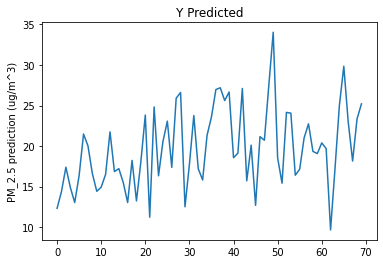

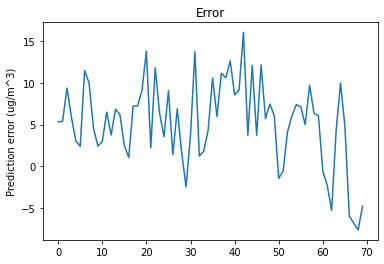

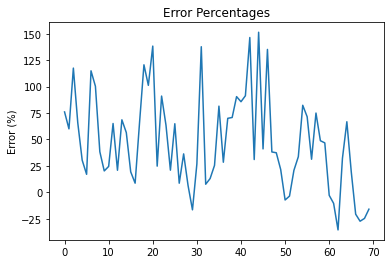

In [76]:
Y = "PM2.5 (ug/m3)"
num_dfDK_AOD = dfDK_AOD.dropna() # Drop any rows with missing data
Y_Reno_test = (num_dfDK_AOD.loc[dfDK_AOD["Year"]==2018])[Y]
x_Reno_test_col = num_dfDK_AOD.columns.values.tolist()[4:]
if "WD (Deg)" in x_Reno_test_col:
  x_Reno_test_col.remove('WD (Deg)')
x_Reno_test_col.remove('AOD_550nm')
#print(x_test_col)
X_Reno_test = (num_dfDK_AOD.loc[dfDK_AOD["Year"]==2018])[x_Reno_test_col]

X_Reno_test = sm.add_constant(X_Reno_test)

Y_pred = PM_ols_reno_2018.predict(X_Reno_test)
#print(Y_pred)
n = range(len(Y_pred))
Test_error = Y_pred - Y_Reno_test
Test_error_percent = (Test_error/Y_Reno_test) * 100

plt.plot(n, Y_pred)
plt.title("Y Predicted")
plt.ylabel("PM_2.5 prediction (ug/m^3)")
plt.figure()
plt.plot(n, Test_error)
plt.title("Error")
plt.ylabel("Prediction error (ug/m^3)")
plt.figure()
plt.plot(n, Test_error_percent)
plt.title("Error Percentages")
plt.ylabel("Error (%)")

RMSE_reno_test = np.sqrt(np.mean(np.array(Test_error)**2, dtype=np.float64))
print("Root mean squared error: ", RMSE_reno_test)
MAPE_reno_test = np.mean(np.array(np.abs(Test_error_percent), dtype=np.float64))
print("Mean absolute percentage error: ", MAPE_reno_test)

Based on the above tests, it seems that the model trained by US data is a poor fit for the South African data available.

We can further demonstrate if this is true by testing on the entire available dataset from South Africa:

Root mean squared error:  24.78889093657702
Mean absolute percentage error:  inf


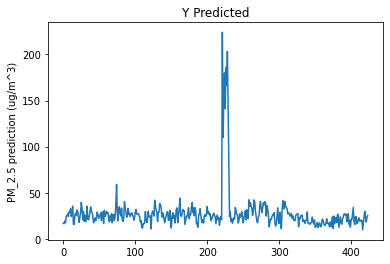

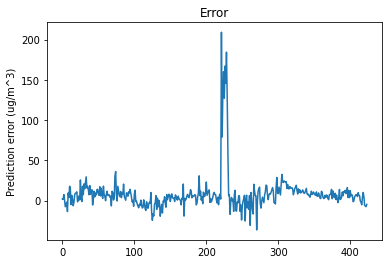

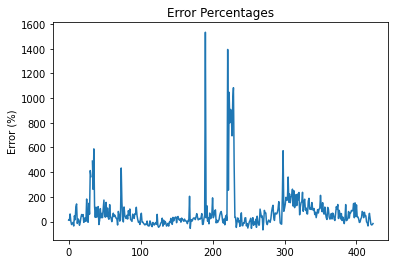

In [77]:
Y = "PM2.5 (ug/m3)"
num_dfDK_AOD = dfDK_AOD.dropna() # Drop any rows with missing data
Y_Reno_test_all = num_dfDK_AOD[Y]
#print(x_test_col)
X_Reno_test_all = num_dfDK_AOD[x_Reno_test_col]

X_Reno_test_all = sm.add_constant(X_Reno_test_all)

Y_pred = PM_ols_reno_2018.predict(X_Reno_test_all)
#print(Y_pred)
n = range(len(Y_pred))
Test_error = Y_pred - Y_Reno_test_all
Test_error_percent = (Test_error/Y_Reno_test_all) * 100

plt.plot(n, Y_pred)
plt.title("Y Predicted")
plt.ylabel("PM_2.5 prediction (ug/m^3)")
plt.figure()
plt.plot(n, Test_error)
plt.title("Error")
plt.ylabel("Prediction error (ug/m^3)")
plt.figure()
plt.plot(n, Test_error_percent)
plt.title("Error Percentages")
plt.ylabel("Error (%)")

RMSE_reno_all = np.sqrt(np.mean(np.array(Test_error)**2, dtype=np.float64))
print("Root mean squared error: ", RMSE_reno_all)
MAPE_reno_all = np.mean(np.array(np.abs(Test_error_percent)))
print("Mean absolute percentage error: ", MAPE_reno_all)

This is a wide error margin, so it would be prudent to conclude that this particular model is not suitable to be used for modelling PM<sub>2.5</sub> concentrations in South Africa.

Other testing that might prove worthwhile would be to use the models trained on South African data to test against US data from the Reno, Nevada sites. The next test to be performed though will be to create a similar model from the US test data, but not to use the AOD measurement in the model at all. We will then check its performance against the South African dataset, as per above.

In [78]:
# Regression excluding Aerosol Optical Depth
Y = "PM2.5 (ug/m3)"
Y_reno_noAOD = dfReno[Y]
x_col_reno_noAOD = reno_data_cols[1:] # Exclude PM2.5
x_col_reno_noAOD.remove("AOD_500nm")
#print(x_col_reno)

X_ols_reno_noAOD = dfReno[x_col_reno_noAOD]
#print(X_ols_aod)
X_ols_reno_noAOD = sm.add_constant(X_ols_reno_noAOD)

PM_ols_reno_noAOD = sm.OLS(Y_reno_noAOD,X_ols_reno_noAOD,missing='drop').fit()
PM_ols_reno_noAOD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PM2.5 (ug/m3)   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.18e-80
Time:                        18:25:29   Log-Likelihood:                -963.25
No. Observations:                 346   AIC:                             1943.
Df Residuals:                     338   BIC:                             1973.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -20.6674      3.330     -6.207      0.000     -27.217     -14.118
CO_1h (ppm)     54.9253      3.562     15.420      0.000      47.919      61.932
NO2_1h (ppb)     0.0575      0.090      0.637      0.525      -0.120       0.235
O3_8h (ppb)      0.2893      0.031      9.249      0.000       0.228       0.351
SO2_1h (ppb)    -3.8959      1.162     -3.353      0.001      -6.181      -1.611
Amb Temp (C)     0.2310      0.052      4.428      0.000       0.128       0.334
Rel Hum (%)      0.0527      0.025      2.095      0.037       0.003       0.102
WS (m/s)         1.1506      0.764      1.506      0.133      -0.352       2.653
==============================================================================
Omnibus:                      146.677   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1035.479
Skew:                           1.607   Prob(JB):                    1.41e-225
Kurtosis:                      10.842   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What is immediately apparent is that without the AOD measurement, the predictive ability of the model is significantly reduced. While it is still a fairly useful estimation in that the adjusted $R$<sup>$2$</sup> value of the model is approximately $0.7$, the model is weaker. Checking against 2018 measurements from Diepkloof, excluding AOD measurements yields the following results:

['CO (ppm)', 'NO2 (ppb)', 'O3 (ppb)', 'SO2 (ppb)', 'Amb Temp (C)', 'Rel Hum (%)', 'WS (m/s)']
Root mean squared error:  27.312879885112288
Mean absolute percentage error:  101.35567393494881


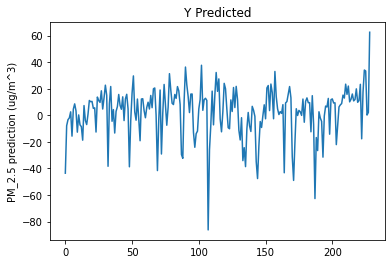

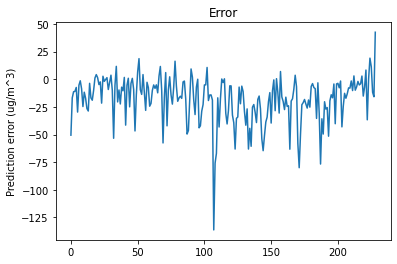

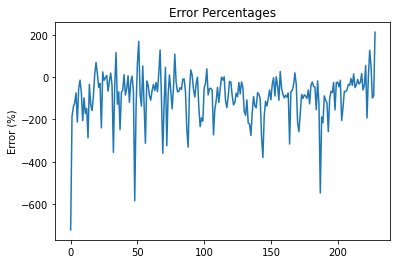

In [79]:
num_dfDK = nan_dfDK.dropna() # Drop NaN values
#num_dfDK.describe()
Y_Reno_test_noAOD = (num_dfDK.loc[num_dfDK["Year"]==2018])[Y]

x_Reno_test_noAOD_col = num_dfDK.columns.values.tolist()[4:]
#x_Reno_test_noAOD_col = list(x_Reno_test_col)
if "WD (Deg)" in x_Reno_test_noAOD_col:
  x_Reno_test_noAOD_col.remove("WD (Deg)")
print(x_Reno_test_noAOD_col)
X_Reno_test_noAOD = (num_dfDK.loc[num_dfDK["Year"]==2018])[x_Reno_test_noAOD_col]

X_Reno_test_noAOD = sm.add_constant(X_Reno_test_noAOD)

Y_pred = PM_ols_reno_noAOD.predict(X_Reno_test_noAOD)
#print(Y_pred)
n = range(len(Y_pred))
Test_error = Y_pred - Y_Reno_test_noAOD
Test_error_percent = (Test_error/Y_Reno_test_noAOD) * 100

plt.plot(n, Y_pred)
plt.title("Y Predicted")
plt.ylabel("PM_2.5 prediction (ug/m^3)")
plt.figure()
plt.plot(n, Test_error)
plt.title("Error")
plt.ylabel("Prediction error (ug/m^3)")
plt.figure()
plt.plot(n, Test_error_percent)
plt.title("Error Percentages")
plt.ylabel("Error (%)")

RMSE_reno_noAOD = np.sqrt(np.mean(np.array(Test_error)**2, dtype=np.float64))
MAPE_reno_noAOD = np.mean(np.array(np.abs(Test_error_percent), dtype=np.float64))
print("Root mean squared error: ", RMSE_reno_noAOD)
print("Mean absolute percentage error: ", MAPE_reno_noAOD)

The results of this test corroborate what was previously observed. The model produces large error margins and removing the AOD parameter from the model only hindered its accuracy in the end.

The last analysis that can be performed is to apply models in the opposite direction. If we take the model trained using Diepkloof data, how well would it predict concentrations in the US? We will narrow the parameters to using only 500nm wavelength to match the US data. 

Root mean squared error:  9.501779860673492
Mean absolute percentage error:  105.3326007397071


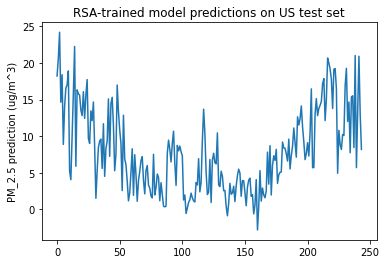

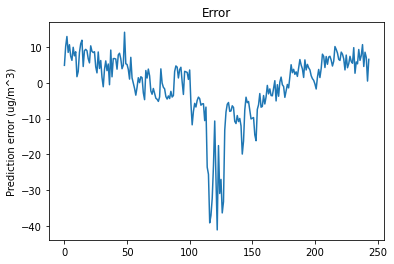

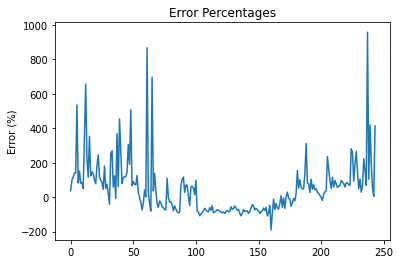

In [80]:
#print(AOD_model_lbls)
num_dfReno = dfReno.dropna() # Drop NaN values
#num_dfDK.describe()
Y_AOD_RSA_renoTest = num_dfReno[Y]

x_RSA_renoTest_col = num_dfReno.columns.values.tolist()[4:] # Exclude dates/PM2.5
X_AOD_RSA_renoTest = num_dfReno[x_RSA_renoTest_col]

X_AOD_RSA_renoTest = sm.add_constant(X_AOD_RSA_renoTest)

Y_pred = PM_ols_aod_500.predict(X_AOD_RSA_renoTest)
#print(Y_pred)
n = range(len(Y_pred))
Test_error = Y_pred - Y_AOD_RSA_renoTest
Test_error_percent = (Test_error/Y_AOD_RSA_renoTest) * 100

plt.plot(n, Y_pred)
plt.title("RSA-trained model predictions on US test set")
plt.ylabel("PM_2.5 prediction (ug/m^3)")
plt.figure()
plt.plot(n, Test_error)
plt.title("Error")
plt.ylabel("Prediction error (ug/m^3)")
plt.figure()
plt.plot(n, Test_error_percent)
plt.title("Error Percentages")
plt.ylabel("Error (%)")

RMSE_RSA_renoTest = np.sqrt(np.mean(np.array(Test_error)**2, dtype=np.float64))
MAPE_RSA_renoTest = np.mean(np.array(np.abs(Test_error_percent), dtype=np.float64))
print("Root mean squared error: ", RMSE_RSA_renoTest)
print("Mean absolute percentage error: ", MAPE_RSA_renoTest)

In [95]:
for l in AOD_model_lbls:
  print(l)

PM_ols_aod_550
PM_ols_aod_500
PM_ols_aod_550_2016
PM_ols_aod_500_2016
PM_ols_aod_550_2017
PM_ols_aod_500_2017
PM_ols_aod_550_fill
PM_ols_aod_500_fill
PM_scaled_model
PM_ols_reno_2018
PM_ols_reno_2018_scaled
